# this code is analysis of experiment using code built with positive control data
[I used simulation data for two systems. In both the Smad pathway is simulated identically, with random noise in parameters and protein expression. The differene in the two systems is that in system 1, [gene = f(Smad3/4)], target gene expression depends directly on nuclear Smad3/Smad4, and in system 2, [gene = f(Smad3/4 , X)] target gene expression depends on nuclear Smad3/Smad4 and a randomly varying other factor, X (which in this case is a factor that affects how strongly Smad3/4 induces gene expression.]

From the simulated data, I use full trajectories for the level nuclear Smad3--that is the concentration of all species of Smad3 in the nucleus, such as would be observed in a microscope. (Note, I am not using trajectories for Smad3/Smad4 complex, which is the actual molecular complex on which gene production depends. I do not use these trajectories because they are not measurable in cells). Second, I use full trajectories of target gene production. For gene expression I analyze either A) a gene whose production depends directly on Smad3/Smad4 binding, or B) a gene whose production depends on a small network motif (3-nodes total, I-FFL1 specifically) that causes production of gene to be proportional to the fold-change in Smad3/Smad4 complex.

For experimental""" analysis, I take trajectories of nuclear NG-Smad3, which were measured in single cells from experiments and I take trajectories of total nuclear Snail:mCherry (or median, see next experiment). I first run diffusion maps on the NG-Smad3 trajectories to obtain a good DMAP for NG-Smad3. Then I obtain a DMAP for Snail using the same method. Then I use Gaussian Process Regression to assess whether Snail dynamics (i.e. Snail DMAP) can be predicted using Smad3 dynamics (i.e. Snail DMAP). 

In order to obtain a good diffusion map, I prepare (process?) the original data in the following way.
1. First, I take raw data as is. This is matrix1. (Matrix1 is M cells X N timepoints)
2. Then I take the raw data and compute the derivative of each trajectory. This is matrix 2. 
3. Then I take the raw data and compute the integral of each trajectory. This is matrix 3. 
4. Then I combine matrices 1, 2 and 3 into one new matrix, MatrixCAT (MatrixCAT is M cells X 3*N timepoints)
5. Then I transform this data set (in a way the preserves the topology of the data set) by normalizing all trajectories at each time point using the following:
    MT = MatrixCAT[t,:] (t=1)
    [MT is an 1 x M array, where M is the number of cells]
    MTn = MT-min(MT)/(max(MT)-min(MT)
    MTns = sqrt(MTn)
    MatrixCATztos[t,:] = MTns
    [I do this for all timepoints]
6. This transformation preserves topology, and it ensures that the difussion distances are similar for each dimension, which is important for finding a good difussion kernel for the diffusion map algoritm. 
7. By including raw data, first derivative of data, and integral of data were are enableing the algorithm to find a difussion Map that uncovers the dynamical features of the data set. 





In [9]:
import time
start = time.time()
for x in range (0,5): 
    print('',end="\r")
    b = "Loading" + "." * x
    print (b, end="")
    
print('')
end = time.time()
print(end - start)

Loading....
0.0007281303405761719


In [10]:
import time


# below this is the one value you must change if you change how this code runs

In [11]:
#epscale paramters
#num_evecs
#peakfindercutoff

#epsilon search parameters
num_eps = 40
eL = 1.2
eH = 3

evecs_cut = True
num_evecs=30

sampiter = 10 #number of times to iterate through Local linear regression
subsampfactor = 8 #scale at which to subsample data for LLR # subsampsize = np.ceil(datasize/subsampfactor)
subsampmax = 500 # never run LLR for more than 500 data pts; it will fail

reducedimval = 50
promval = 0.1 #defines prominence of peaks at which to threshold

# specid = 'EXP_S3conc_SNAILconc_gpy_LLRpeakfinder-AGNOSTIC-ztosqrtResample'
specid = 'agnostic-AGI-zto_numeps'+str(num_eps)+'-'+str(eL)+'-'+str(eH)+'_rdimval'+str(reducedimval)+'_n-evecs'+str(num_evecs)+'cut-'+str(evecs_cut)+'_promval-'+str(promval)+'_SI-'+str(sampiter)+'_subsampF'+str(subsampfactor)+'_sampmax'+str(subsampmax)  
print(specid)

#SESSIONNAME this needs all of the above information
#this is for saving the pickle file


# conditionid = 'exp3'     #exp3, exp4, expSYST1_PC, expSYST2_PC, expSYST3_PC
# complex_rsmad_SMADtot_SMADmed = 'median'     #median, total, complex, rsmad
# iffl_caga_SNAtot_SNAmed = 'median'   #median, total, iffl, caga

agnostic-AGI-zto_numeps40-1.2-3_rdimval50_n-evecs30cut-True_promval-0.1_SI-10_subsampF8_sampmax500


/Users/frick/Dparams/DParamsFinal_v5
12  runs to perform
----- exp3 - median - median
smad and snail experiment
smad median
snail median
# of NaNs in dataset =  0


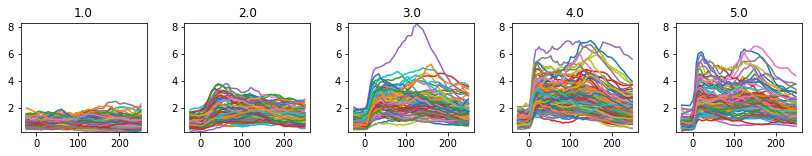

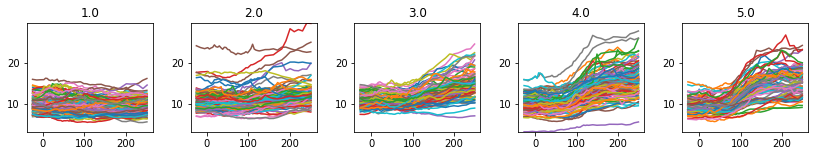

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp3_SMAD-median_GENE-median/
observed_data_in shape= (425, 48)
observed_data_out shape= (425, 48)
time_data shape= (425, 48)
datain shape =  (425, 144)


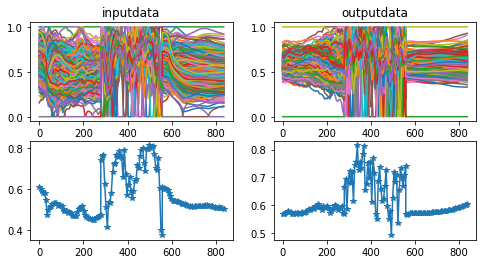

smad
eps_min= 0.3149046045124771
eps_max= 3.3030887554074697

snail
eps_min= 0.7323612442850516
eps_max= 4.130322264226106
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


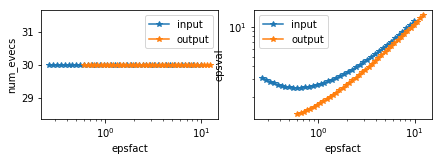

size after dimensionality reduction for input into GPy= (425, 50)

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp3_SMAD-median_GENE-medianpickle
pickle success!!!


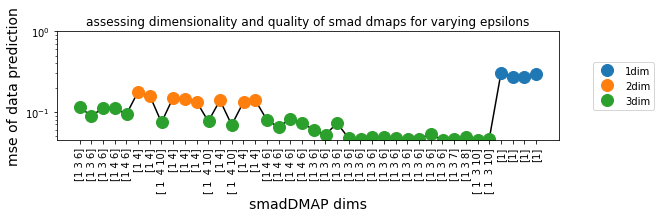

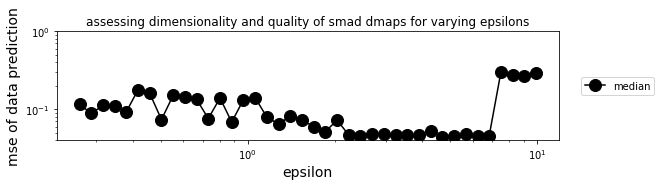

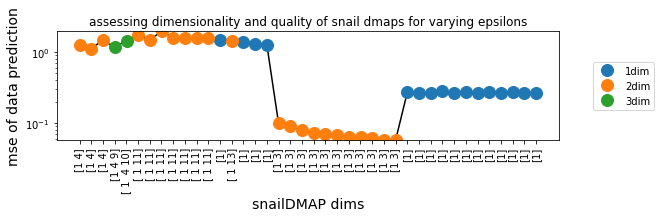

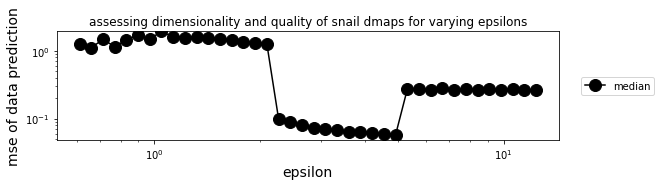

----- exp3 - median - total
smad and snail experiment
smad median
snail total
# of NaNs in dataset =  0


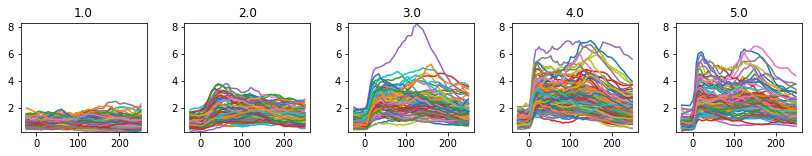

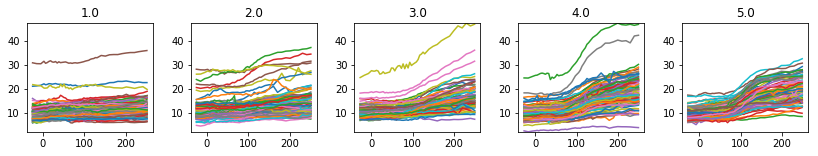

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp3_SMAD-median_GENE-total/
observed_data_in shape= (425, 48)
observed_data_out shape= (425, 48)
time_data shape= (425, 48)
datain shape =  (425, 144)


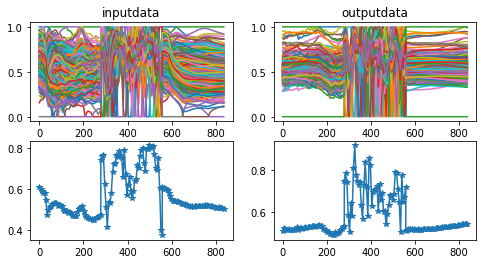

smad
eps_min= 0.3149046045124771
eps_max= 3.3030887554074697

snail
eps_min= 0.5932955443892798
eps_max= 4.011460177793987
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


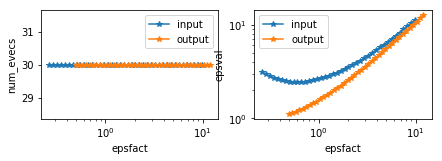

size after dimensionality reduction for input into GPy= (425, 50)

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp3_SMAD-median_GENE-totalpickle
pickle success!!!


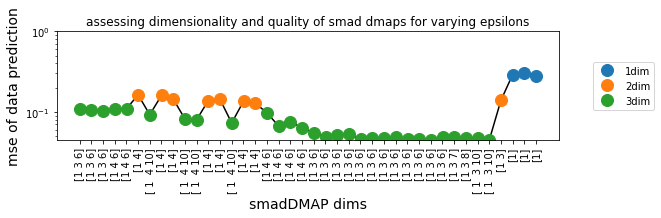

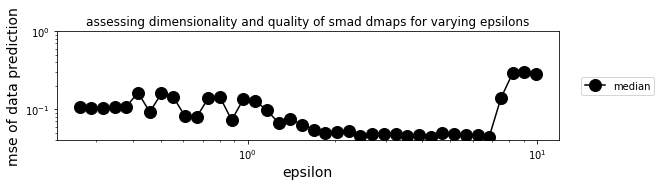

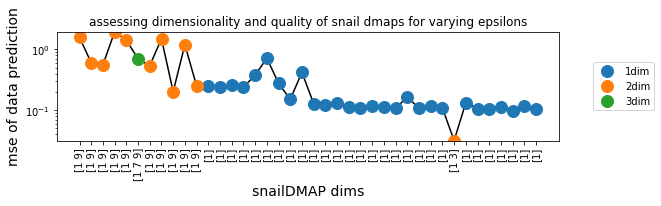

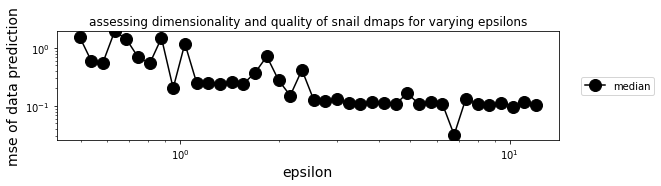

----- exp3 - total - median
smad and snail experiment
smad total
snail median
# of NaNs in dataset =  0


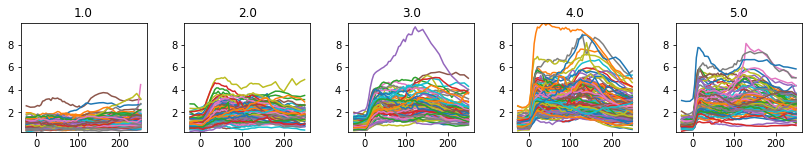

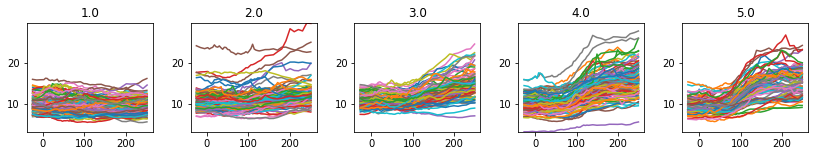

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp3_SMAD-total_GENE-median/
observed_data_in shape= (425, 48)
observed_data_out shape= (425, 48)
time_data shape= (425, 48)
datain shape =  (425, 144)


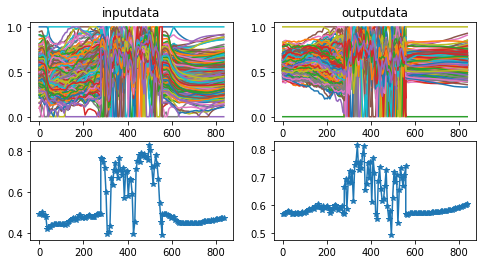

smad
eps_min= 0.36391846420964197
eps_max= 3.3959267123542958

snail
eps_min= 0.7323612442850516
eps_max= 4.130322264226106
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


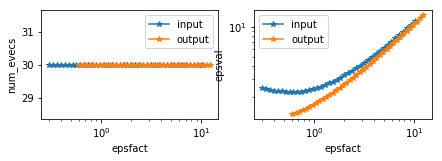

size after dimensionality reduction for input into GPy= (425, 50)

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp3_SMAD-total_GENE-medianpickle
pickle success!!!


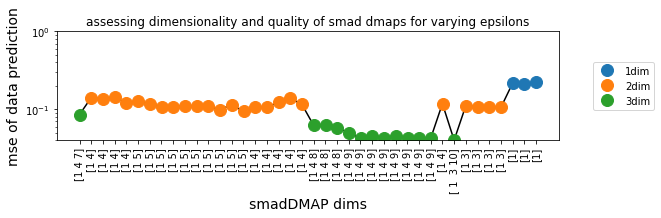

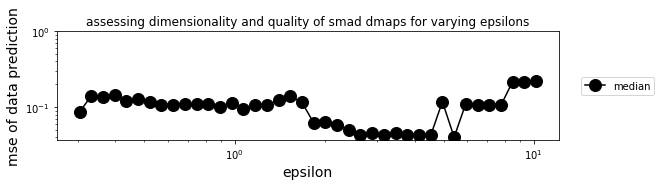

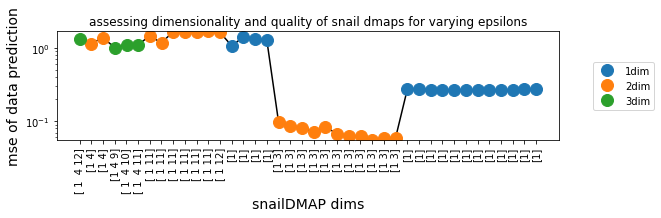

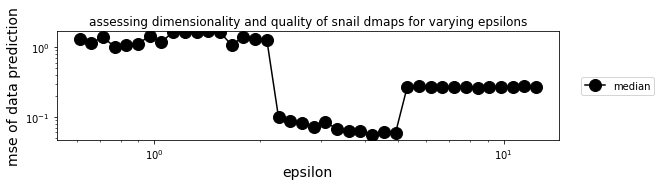

----- exp3 - total - total
smad and snail experiment
smad total
snail total
# of NaNs in dataset =  0


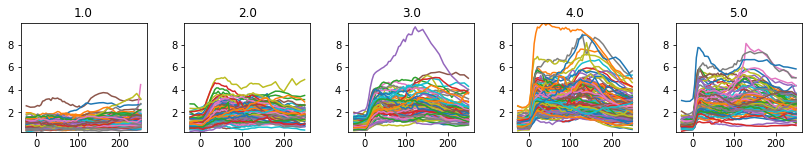

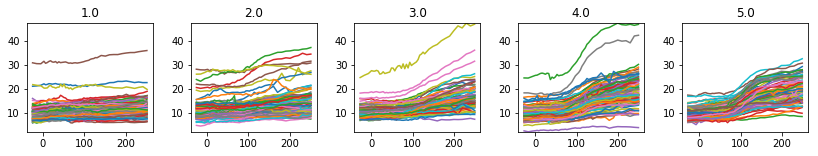

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp3_SMAD-total_GENE-total/
observed_data_in shape= (425, 48)
observed_data_out shape= (425, 48)
time_data shape= (425, 48)
datain shape =  (425, 144)


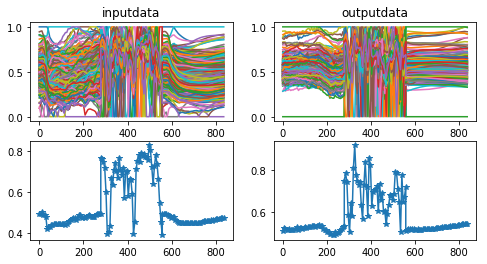

smad
eps_min= 0.36391846420964197
eps_max= 3.3959267123542958

snail
eps_min= 0.5932955443892798
eps_max= 4.011460177793987
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


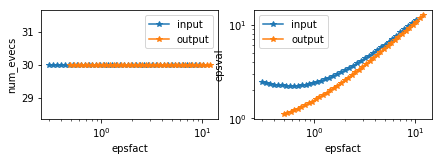

size after dimensionality reduction for input into GPy= (425, 50)

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 54.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp3_SMAD-total_GENE-totalpickle
pickle success!!!


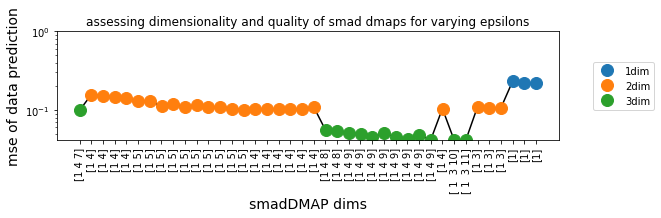

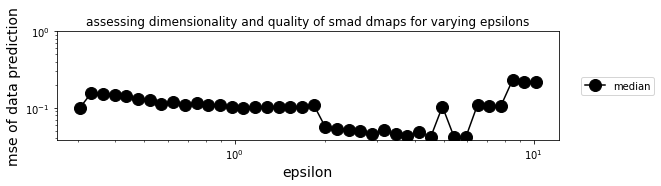

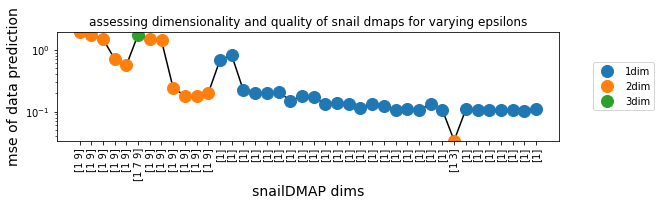

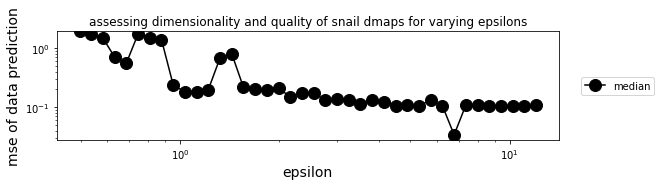

----- exp4 - median - median
smad and snail experiment
smad median
snail median
# of NaNs in dataset =  0


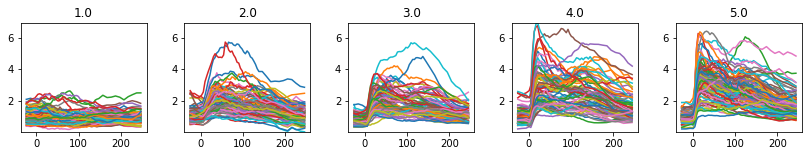

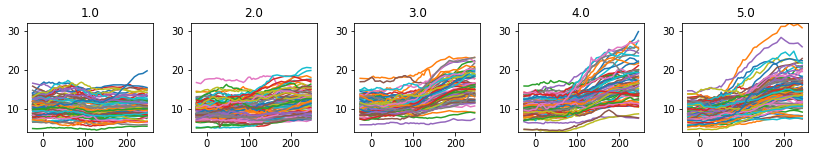

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp4_SMAD-median_GENE-median/
observed_data_in shape= (379, 50)
observed_data_out shape= (379, 50)
time_data shape= (379, 50)
datain shape =  (379, 150)


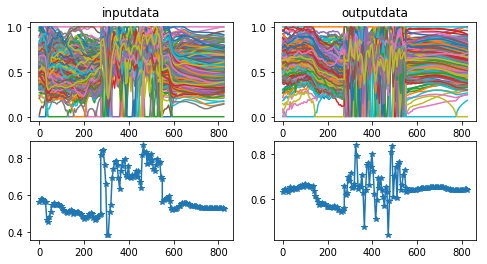

smad
eps_min= 0.26767527415630016
eps_max= 3.511675870087232

snail
eps_min= 0.4198971494689646
eps_max= 3.594385750108357
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


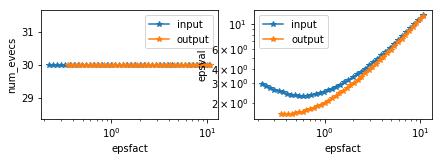

size after dimensionality reduction for input into GPy= (379, 50)

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp4_SMAD-median_GENE-medianpickle
pickle success!!!


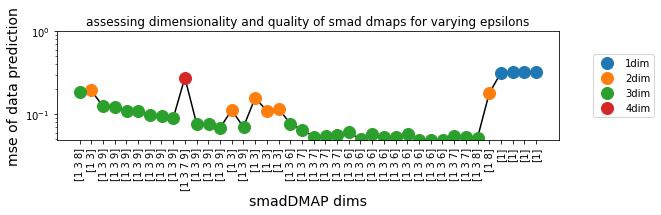

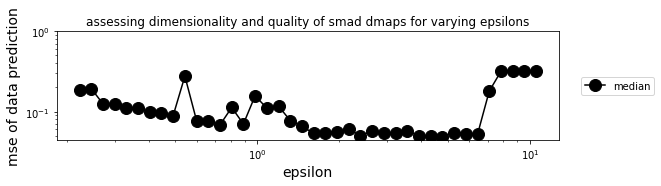

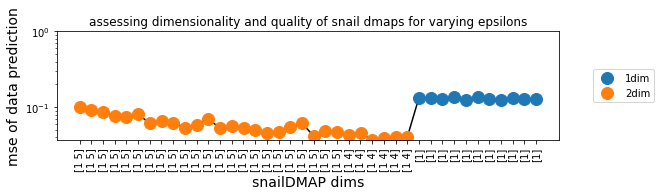

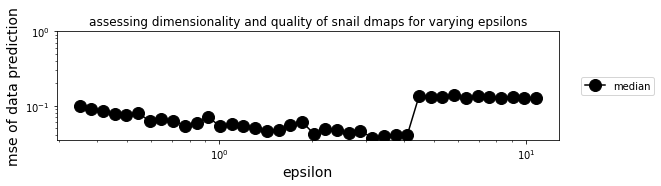

----- exp4 - median - total
smad and snail experiment
smad median
snail total
# of NaNs in dataset =  0


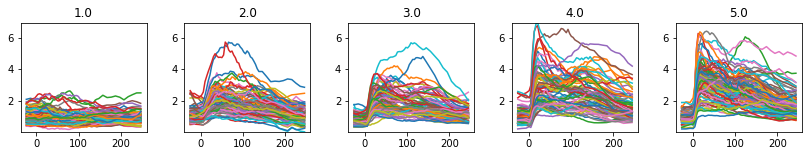

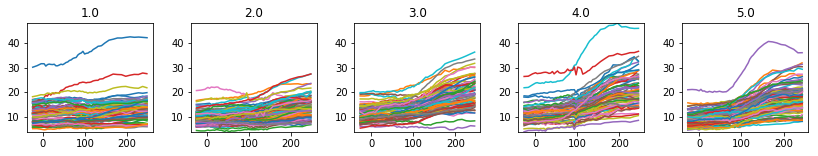

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp4_SMAD-median_GENE-total/
observed_data_in shape= (379, 50)
observed_data_out shape= (379, 50)
time_data shape= (379, 50)
datain shape =  (379, 150)


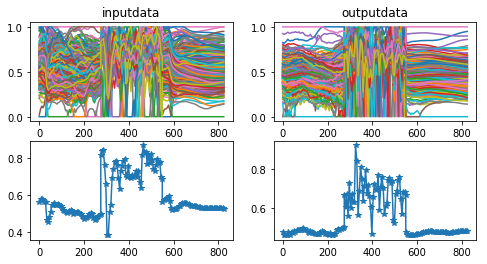

smad
eps_min= 0.26767527415630016
eps_max= 3.511675870087232

snail
eps_min= 0.4685540441105229
eps_max= 4.176489145867976
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


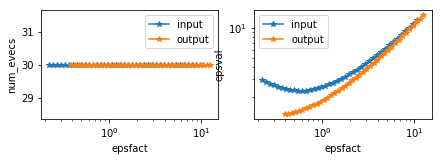

size after dimensionality reduction for input into GPy= (379, 50)

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp4_SMAD-median_GENE-totalpickle
pickle success!!!


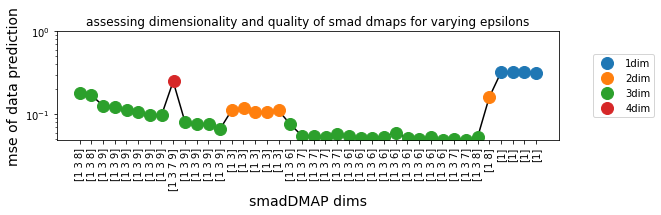

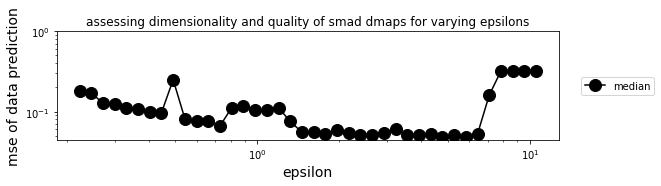

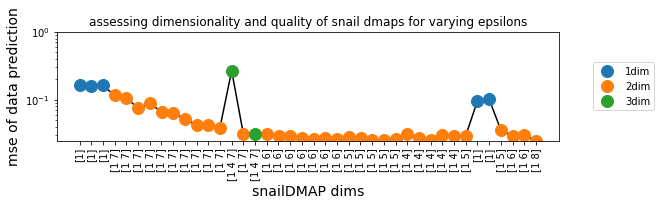

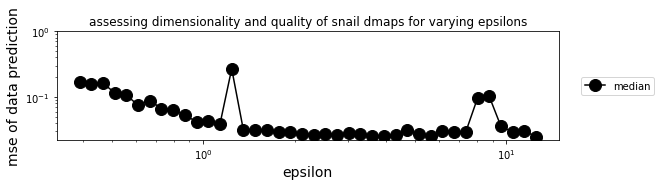

----- exp4 - total - median
smad and snail experiment
smad total
snail median
# of NaNs in dataset =  0


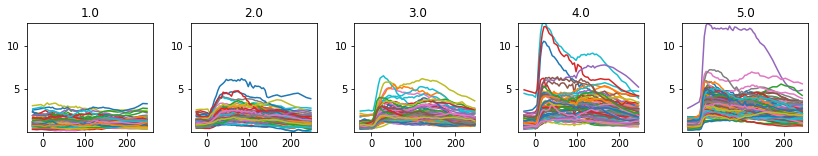

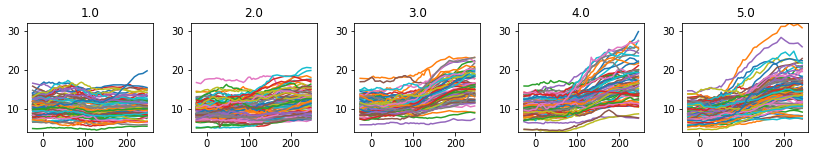

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp4_SMAD-total_GENE-median/
observed_data_in shape= (379, 50)
observed_data_out shape= (379, 50)
time_data shape= (379, 50)
datain shape =  (379, 150)


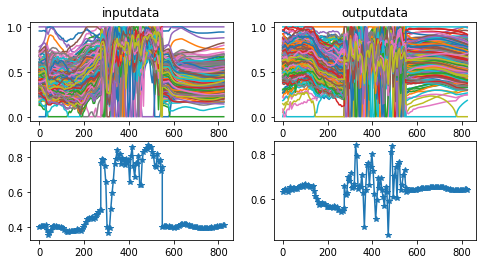

smad
eps_min= 0.9174605412647724
eps_max= 4.227988890874175

snail
eps_min= 0.4198971494689646
eps_max= 3.594385750108357
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


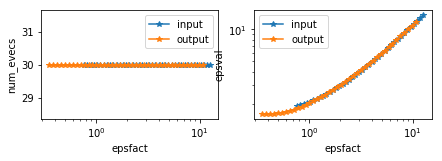

size after dimensionality reduction for input into GPy= (379, 50)

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp4_SMAD-total_GENE-medianpickle
pickle success!!!


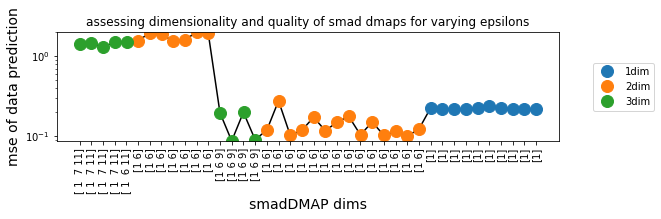

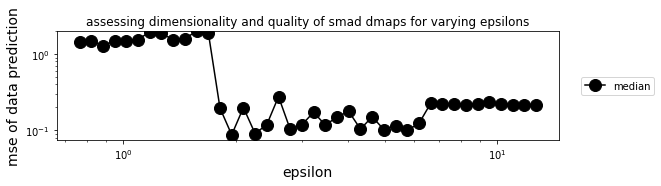

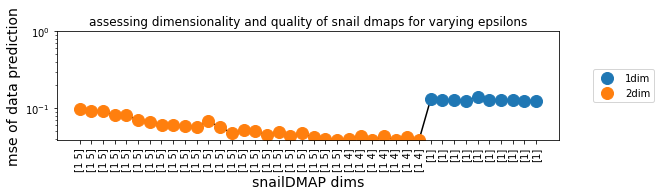

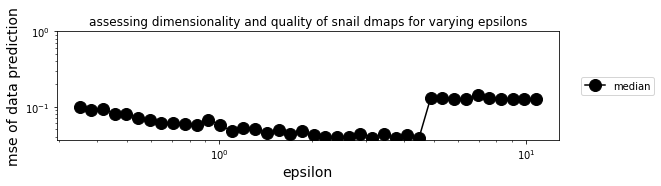

----- exp4 - total - total
smad and snail experiment
smad total
snail total
# of NaNs in dataset =  0


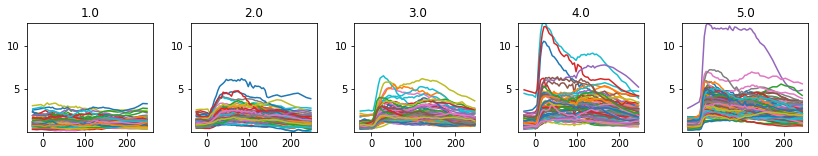

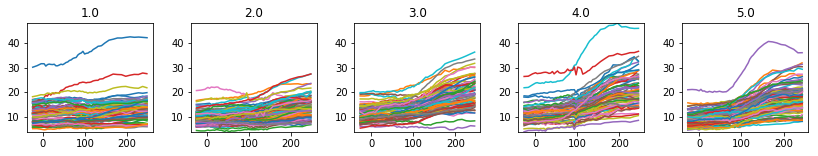

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/exp4_SMAD-total_GENE-total/
observed_data_in shape= (379, 50)
observed_data_out shape= (379, 50)
time_data shape= (379, 50)
datain shape =  (379, 150)


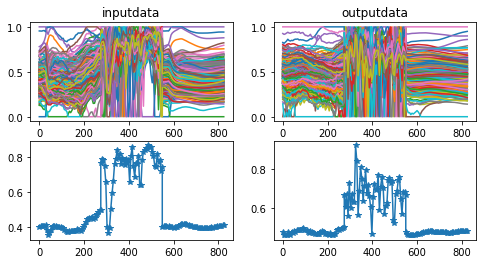

smad
eps_min= 0.9174605412647724
eps_max= 4.227988890874175

snail
eps_min= 0.4685540441105229
eps_max= 4.176489145867976
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


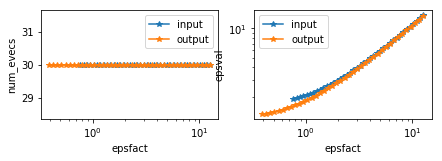

size after dimensionality reduction for input into GPy= (379, 50)

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 50.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexp4_SMAD-total_GENE-totalpickle
pickle success!!!


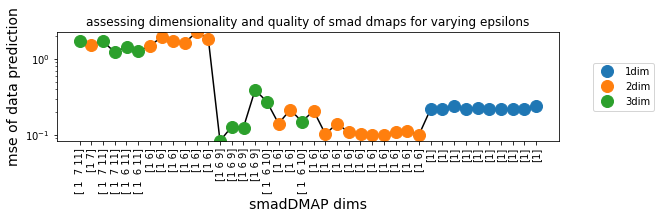

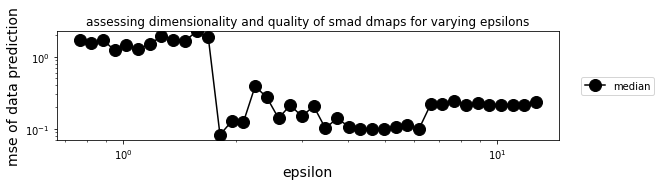

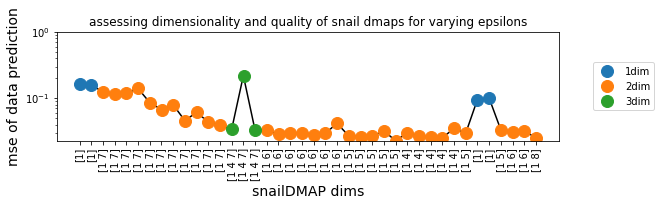

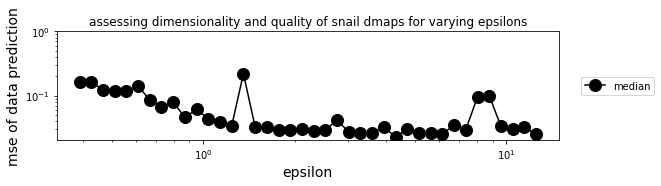

----- expSYST3_PC - rsmad - iffl
smad and gene model
rsmad
iffl
it elsed
# of NaNs in dataset =  0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


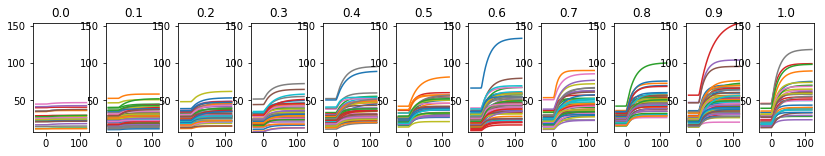

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


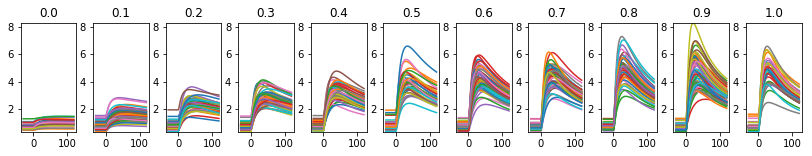

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/expSYST3_PC_SMAD-rsmad_GENE-iffl/
observed_data_in shape= (500, 227)
observed_data_out shape= (500, 227)
time_data shape= (500, 227)
low sqrt error at 227
228 ,229 ,230 ,231 ,232 ,233 ,234 ,235 ,236 ,237 ,238 ,239 ,240 ,241 ,242 ,243 ,244 ,245 ,246 ,247 ,248 ,249 ,250 ,251 ,252 ,253 ,254 ,255 ,256 ,257 ,258 ,259 ,260 ,261 ,262 ,263 ,264 ,265 ,266 ,267 ,268 ,269 ,270 ,datain shape =  (500, 681)


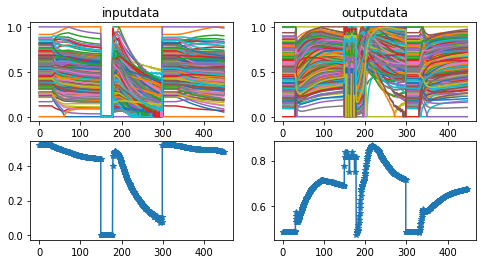

smad
eps_min= 3.042558181777501
eps_max= 22.554183291411434

snail
eps_min= 2.0607561847495046
eps_max= 22.1963945368369
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


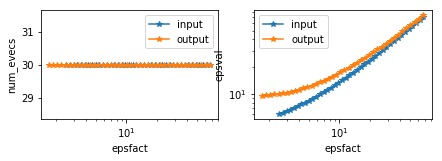

size after dimensionality reduction for input into GPy= (500, 47)

subsampsize= 63.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 63.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexpSYST3_PC_SMAD-rsmad_GENE-ifflpickle
pickle success!!!


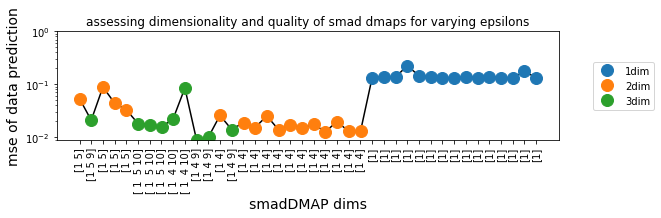

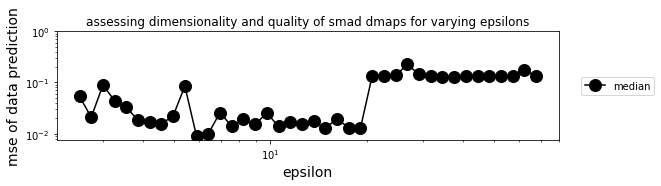

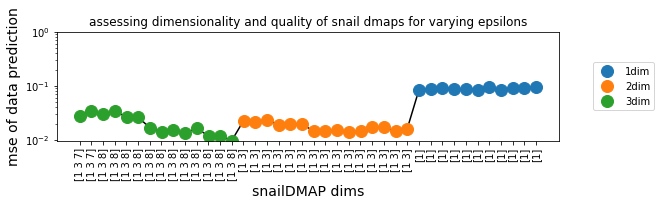

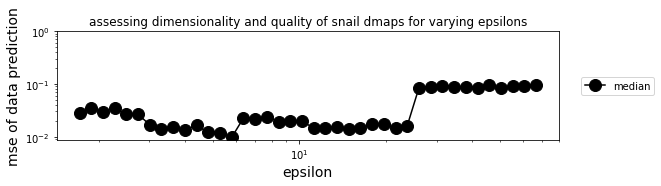

----- expSYST3_PC - rsmad - caga
smad and gene model
rsmad
caga
it elsed
# of NaNs in dataset =  0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


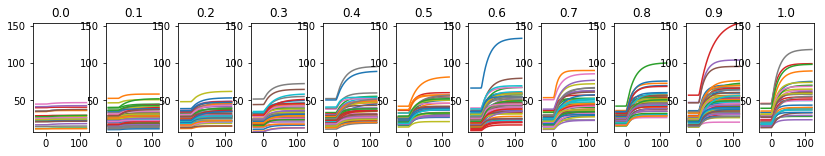

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


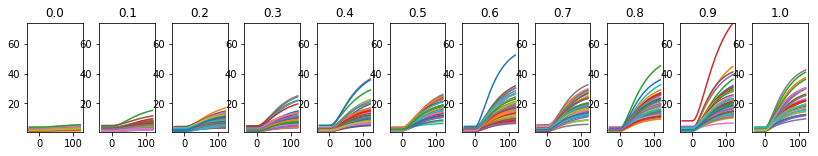

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/expSYST3_PC_SMAD-rsmad_GENE-caga/
observed_data_in shape= (500, 227)
observed_data_out shape= (500, 227)
time_data shape= (500, 227)
low sqrt error at 227
228 ,229 ,230 ,231 ,232 ,233 ,234 ,235 ,236 ,237 ,238 ,239 ,240 ,241 ,242 ,243 ,244 ,245 ,246 ,247 ,248 ,249 ,250 ,251 ,252 ,253 ,254 ,255 ,256 ,257 ,258 ,259 ,260 ,261 ,262 ,263 ,264 ,265 ,266 ,267 ,268 ,269 ,270 ,low sqrt error at 227
228 ,229 ,230 ,231 ,232 ,233 ,234 ,235 ,238 ,239 ,240 ,241 ,242 ,243 ,244 ,245 ,246 ,247 ,248 ,249 ,250 ,251 ,252 ,253 ,254 ,255 ,256 ,257 ,258 ,259 ,260 ,261 ,262 ,263 ,264 ,265 ,266 ,267 ,268 ,269 ,270 ,datain shape =  (500, 681)


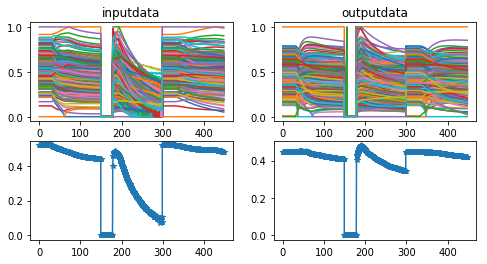

smad
eps_min= 3.042558181777501
eps_max= 22.554183291411434

snail
eps_min= 2.9652846732076186
eps_max= 23.823182274303836
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


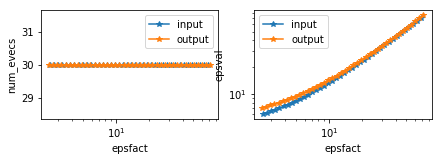

size after dimensionality reduction for input into GPy= (500, 47)

subsampsize= 63.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for smad...

subsampsize= 63.0
a= 40 / 40
done with assessing DMAP dimensionality and accuracy for snail...

saved as...:    /Users/frick/Dparams/DParamsFinal_v5/agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/epssearchexpSYST3_PC_SMAD-rsmad_GENE-cagapickle
pickle success!!!


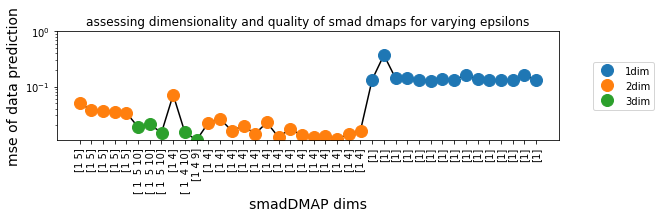

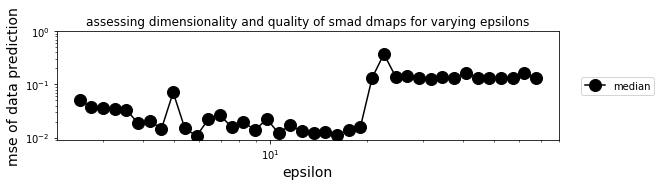

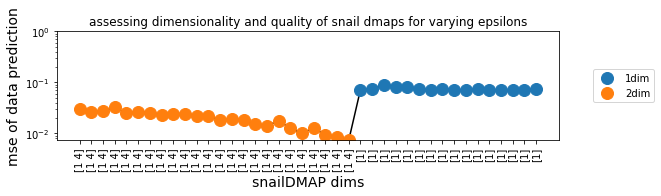

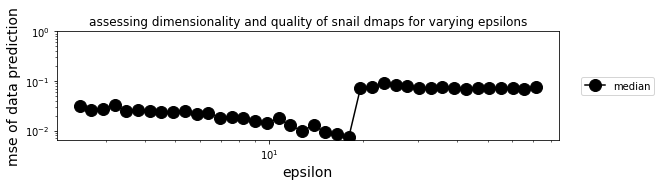

----- expSYST3_PC - complex - iffl
smad and gene model
complex
iffl
it elsed
# of NaNs in dataset =  0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


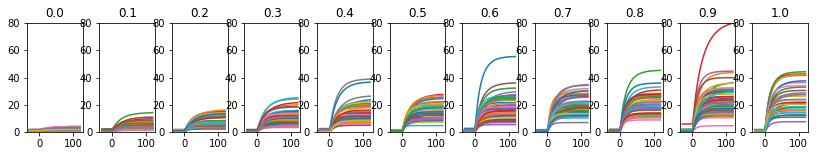

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


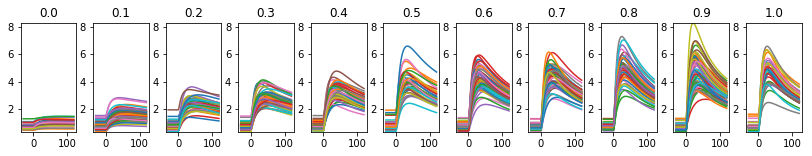

saving csv files here /Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps40-1dot2-3_rdimval50_n-evecs30cut-True_promval-0dot1_SI-10_subsampF8_sampmax500/expSYST3_PC_SMAD-complex_GENE-iffl/
observed_data_in shape= (500, 227)
observed_data_out shape= (500, 227)
time_data shape= (500, 227)
low sqrt error at 227
228 ,229 ,230 ,231 ,232 ,233 ,234 ,235 ,236 ,237 ,238 ,239 ,240 ,241 ,242 ,243 ,244 ,245 ,246 ,247 ,248 ,249 ,250 ,251 ,252 ,253 ,254 ,255 ,256 ,257 ,258 ,259 ,260 ,261 ,262 ,263 ,264 ,265 ,266 ,267 ,268 ,269 ,270 ,datain shape =  (500, 681)


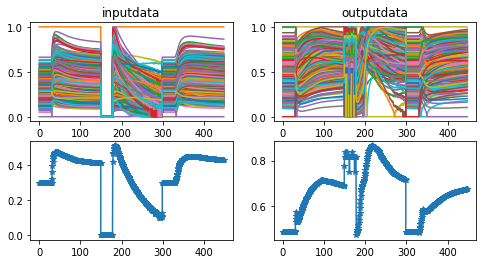

smad
eps_min= 4.257187388728427
eps_max= 26.91256439018178

snail
eps_min= 2.0607561847495046
eps_max= 22.1963945368369
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 done


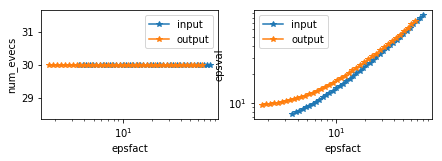

size after dimensionality reduction for input into GPy= (500, 47)

subsampsize= 63.0
a= 7 / 40

LinAlgError: SVD did not converge in Linear Least Squares

In [13]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)
import sys
sys.path.insert(0, cwd) 


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation
import numpy as np

import matplotlib.tri as mtri

from scipy.integrate import odeint
from scipy.integrate import complex_ode

import scipy.spatial.distance
import scipy
import scipy.interpolate
import scipy.signal
import itertools 
import re

from dmap_sp_chrisNEW import *
import os

import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)
    
from accessory import *

a = ['exp3','exp4']
b = ['median','total']
c = ['median','total']
d1 = list(itertools.product(a, b, c))

# a = ['expSYST1_PC','expSYST2_PC','expSYST3_PC']
a = ['expSYST1_PC','expSYST2_PC']
# a = ['expSYST3_PC']
b = ['rsmad','complex']
c = ['iffl','caga']
d2 = list(itertools.product(a, b, c))


# dall = d1+d2
dall = d2
print(len(dall), ' runs to perform')
for run_details in dall:
#     print(run_details)
    conditionid = run_details[0]
    complex_rsmad_SMADtot_SMADmed = run_details[1]
    iffl_caga_SNAtot_SNAmed= run_details[2]
    print('-----', conditionid, '-', complex_rsmad_SMADtot_SMADmed, '-', iffl_caga_SNAtot_SNAmed,)
    
    session_name = 'epssearch' + conditionid + '_SMAD-' + complex_rsmad_SMADtot_SMADmed + '_GENE-' + iffl_caga_SNAtot_SNAmed

    cond2 = ''
    exp_path = '' + conditionid + '/'
    specidpath = specid.replace(".", "dot")
    csvsavepath = 'dmapcsv_' + specidpath + '/' + conditionid + '_SMAD-' + complex_rsmad_SMADtot_SMADmed + '_GENE-' + iffl_caga_SNAtot_SNAmed + '/'

    repo = str(cwd) +'/'

    data_path = repo + exp_path + "/"
    data_path2 = data_path
    fig_path1 = repo +  "figureFolder/" 
#     print(not (os.path.isdir(fig_path1)))
    if not (os.path.isdir(fig_path1)):
        print('making' + fig_path1)
        os.mkdir(fig_path1)
    
    fig_path = fig_path1 + specidpath + '/'

#     print(not (os.path.isdir(fig_path)))
    if not (os.path.isdir(fig_path)):
        print('making' + fig_path)
        os.mkdir(fig_path)


    #in this processed form, I find that using DMAPs does not improve the accuracy of representing the data above using timepoint combinations
    #smad abundance vs Snail difference

    #EXPERIMENTAL DATA
    if bool(re.search('exp[0-9]',conditionid)):
        print('smad and snail experiment')

        #assign Smad CSV file names
        if bool(re.search('median',complex_rsmad_SMADtot_SMADmed)):
            print('smad median')
            params = "smadMatrix.csv"
        elif bool(re.search('total',complex_rsmad_SMADtot_SMADmed)):
            print('smad total')
            params = "smadMatrixTOTAL.csv"

        #assign Snail CSV file names    
        if bool(re.search('median',iffl_caga_SNAtot_SNAmed)):
            print('snail median')
            params2 = "outputMatrix.csv"
        elif bool(re.search('total',iffl_caga_SNAtot_SNAmed)):
            print('snail total')
            params2 = "outputMatrixTOTAL.csv"

    #     params = "smadMatrix.csv"
    #     params2 = "outputMatrix.csv"
        timematrix = "timematrix.csv"
        datamatrix = "dosageData.csv"
        filename = data_path + params
        tcut = 'no'
        tscale = 'no'




    #SIMULATION DATA
    elif bool(re.search('SYST[0-9]',conditionid)):
        print('smad and gene model')
        #assign SMAD CSV file names 
        if bool(re.search('rsmad',complex_rsmad_SMADtot_SMADmed)):
            print('rsmad')
            params = "rsmad.csv"
        elif bool(re.search('complex',complex_rsmad_SMADtot_SMADmed)):
            print('complex')
            params = "smadcomplex.csv"

        #assign GENE CSV file names   
        if bool(re.search('iffl',iffl_caga_SNAtot_SNAmed)):
            print('iffl')
            params2 = "zgene.csv"
        elif bool(re.search('caga',iffl_caga_SNAtot_SNAmed)):
            print('caga')
            params2 = 'cagagene.csv'

    #     params = "rsmad.csv"
    #     params = "smadcomplex.csv"
    #     params2 = "zgene.csv"
    #     params2 = 'cagagene.csv'
        timematrix = "timematrix.csv"
        datamatrix = "dosageData.csv"
        filename = data_path + params
        print('it elsed')
        tcut = 'yes'
        tscale = 'yes'

    else:
        error('wrong file names')


    crs = open(filename, "r")
    counter = 1
    for columns in ( raw.strip().split() for raw in crs ):  
        if counter > 1:
            break
        counter+=1

    # load data files and rescale as necessary
    datamatrix_path_in = data_path + params
    datamatrix_path_out = data_path + params2
    timematrix_path = data_path + timematrix
    dosage_path = data_path + datamatrix

    observed_data_in0 = np.genfromtxt(datamatrix_path_in, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    observed_data_out0 = np.genfromtxt(datamatrix_path_out, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    time_data0 = np.genfromtxt(timematrix_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    dosage_data = np.genfromtxt(dosage_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

    def plot_all_doses(yset,t1,dosage_data):
        udose = np.unique(dosage_data)
        if len(udose)>10:
            dosage_data = np.round(dosage_data,1)
            udose = np.unique(dosage_data)
            print(udose)
        fig = plt.figure(figsize=(14,2))
        for i in range(len(udose)):
            u = udose[i]
            dd = np.where(dosage_data==u)
            didx = dd[0]
            ax = fig.add_subplot(1,len(udose),i+1)
            x = t1[didx,:]
            y = yset[didx,:]
            plt.plot(x.T,y.T)
            plt.ylim(np.min(yset.flatten()),np.max(yset.flatten()))
            plt.title(u)

        fig.subplots_adjust(wspace=0.3)
        plt.show()


    observed_data_in = observed_data_in0.copy()
    observed_data_out = observed_data_out0.copy()    
    time_data = time_data0.copy()
    in0 = observed_data_in.copy() 
    out0 = observed_data_out.copy()
    t0 = time_data.copy()

    if tcut == 'yes':
        tvec = t0[1,:]
        idx = (tvec<2) & (tvec>-0.5)
        t2 = (np.where(idx))[0]
        observed_data_in = observed_data_in[:,t2]
        observed_data_out = observed_data_out[:,t2]  
        if tscale == 'yes':
            time_data = time_data[:,t2]*60
        else:
            time_data = time_data[:,t2]

    observed_data_in[np.isnan(observed_data_in)] = 0
    observed_data_out[np.isnan(observed_data_out)] = 0
    print('# of NaNs in dataset = ', np.sum(np.isnan(observed_data_in)))


    if np.max(time_data[1,:])<60:
        error('time must be in hrs not mintues')


    # plt.plot(np.asarray(range(time_data.shape[1])),time_data[1,:])
    # plt.ylabel('minutes')
    # plt.xlabel('index')
    # plt.title(conditionid)

    plot_all_doses(observed_data_in.copy(),time_data.copy(),dosage_data)  
    plot_all_doses(observed_data_out.copy(),time_data.copy(),dosage_data)  

    newcsvpath = repo + csvsavepath

    if not os.path.exists(newcsvpath):
        os.makedirs(newcsvpath)
    print('saving csv files here', newcsvpath)
    a = numpy.asarray(observed_data_in)
    numpy.savetxt(newcsvpath+"smadMatrix_PYdat.csv", a, delimiter=",")
    a = numpy.asarray(observed_data_out)
    numpy.savetxt(newcsvpath+"outputMatrixDIFF_PYdat.csv", a, delimiter=",")
    a = numpy.asarray(time_data)
    numpy.savetxt(newcsvpath+"timeMatrix_PYdat.csv", a, delimiter=",")

    def zero_one_individ(data):
        for k in range(0,data.shape[1]):   
            data[:,k] = data[:,k] - np.min(data[:,k])
            data[:,k] = data[:,k] / np.max(data[:,k])
        #     observed_data_in[:,k] = np.log(observed_data_in[:,k]+1e-0)
            data[:,k] = np.sqrt(data[:,k])
        return data

    def zero_one_population(data):
        ogdingrad = data.copy()
        for k in range(0,data.shape[0]):  
            data[k,:] = data[k,:] - np.min(ogdingrad[:])
            data[k,:] = data[k,:] / (np.max(ogdingrad[:])-np.min(ogdingrad[:]))
        return data

    def zero_one_dimension(data):
        ogdingrad = data.copy()
        for i in range(0,data.shape[1]):  
            dimdat = ogdingrad[:,i]
            for k in range(0,data.shape[0]):  
                data[k,i] = data[k,i] - np.min(dimdat[:])
                data[k,i] = data[k,i] / (np.max(dimdat[:])-np.min(dimdat[:]))
        return data

    def zero_one_sqrt(data):
        i = 0
        for k in range(0,data.shape[1]):
            if np.std(data[:,k])>1e-14:
                data[:,k] = data[:,k] - np.min(data[:,k])
                data[:,k] = data[:,k] / np.max(data[:,k])
                #observed_data_out[:,k] = np.log(observed_data_out[:,k]+1e-0)
                data[:,k] = np.sqrt(data[:,k])
            else:
                i=i+1
                if i==1:
                    print('low sqrt error at',k)
                else:
                    print(k,',',end="")
        return data



    def foldchangefunc(data_in,time_in,basalwindow):
        tvec = time_in[1,:]
        tidx = ((tvec<basalwindow[1]) & (tvec>=basalwindow[0]))
        basal0 = np.where(tidx)
        basal = basal0[0]
        ogdata_in = data_in.copy()
        for k in range(0,data_in.shape[0]):  
            data_in[k,:] = data_in[k,:]/np.median(ogdata_in[k,basal])
        return data_in   



    def differencefunc(data_in,time_in,basalwindow):
        tvec = time_in[1,:]
        tidx = ((tvec<basalwindow[1]) & (tvec>=basalwindow[0]))
        basal0 = np.where(tidx)
        basal = basal0[0]
        ogdata_in = data_in.copy()
        for k in range(0,data_in.shape[0]):  
            data_in[k,:] = data_in[k,:]-np.median(ogdata_in[k,basal])
        return data_in   



    def resampledata(data_in,time_in,gradcut,rlh):
        tvec = time_in[1,:]

    #     tvec = time_data[1,:]-np.min(time_data[1,:])
        pt = np.gradient(data_in.copy(),tvec,axis=1)
        pt = np.gradient(pt,tvec,axis=1)
        pt = np.abs(pt)
        pt = np.median(pt,axis=0)
        pt = (pt-np.min(pt))/(np.percentile(pt,95)-np.min(pt))
        plt.figure(figsize=(1,1))
        plt.semilogy(pt.T)
        plt.semilogy([0,len(pt)],[gradcut,gradcut])
        plt.ylim(1e-9,10)
        plt.show()

        firstT = np.where(pt>gradcut)
        tx = firstT[0]
        tx1i = np.max((tx[0]-1,0))
        tx2i = tx[-1]
        print([tx1i,tx2i])
        tkeep = [tx1i,tx2i]

        lowreg = rlh[0] #every 60 minutes
        highreg = rlh[1] #every 10 minutes

        treg = np.ceil((tvec[tkeep[0]]-tvec[0])/lowreg)
        tinterp1 = np.linspace(tvec[0],tvec[tkeep[0]],treg)

        treg = np.ceil((tvec[tkeep[1]]-tvec[tkeep[0]+1])/highreg)
        tinterp2 = np.linspace(tvec[tkeep[0]+1],tvec[tkeep[1]],treg)

        treg = np.ceil((tvec[-1]-tvec[tkeep[1]+1])/lowreg)
        tinterp3 = np.linspace(tvec[tkeep[1]+1],tvec[-1],treg)
        tinterp = np.hstack((tinterp1,tinterp2,tinterp3))
        print(tinterp)

        keep_in = data_in.copy()
        x = tinterp
        time_datanew = np.zeros((keep_in.shape[0],len(x)))
        obsdnew = np.zeros((keep_in.shape[0],len(x)))
        for k in range(0,data_in.shape[0]): 
            xp = time_in[k,:]
            fp = keep_in[k,:]
            yp = numpy.interp(x, xp, fp, left=None, right=None, period=None)
            obsdnew[k,:] = yp
            time_datanew[k,:] = x

        data_out = obsdnew
        time_out = time_datanew


        return data_out, time_out


    def timesync_via_interpolation(observed_data_in,time_data):
        ogdin = observed_data_in.copy()
        observed_data_new = np.zeros(ogdin.shape)
        x = np.linspace(np.min(time_data[:]),np.max(time_data[:]),time_data.shape[1])
        time_datanew = np.zeros(time_data.shape)
        for k in range(0,observed_data_in.shape[0]): 
            xp = time_data[k,:]
            fp = ogdin[k,:]
            yp = numpy.interp(x, xp, fp, left=None, right=None, period=None)
            observed_data_new[k,:] = yp
            time_datanew[k,:] = x

        return time_datanew, observed_data_new


    #interpolate the experimental data so all of the trajectories are sampled at synchronized intervals. 
    # if conditionid == 'exp4' or conditionid == 'exp3':

    if bool(re.search('exp[0-9]',conditionid)):
        time_data, observed_data_in = timesync_via_interpolation(observed_data_in,time_data)
        _, observed_data_out = timesync_via_interpolation(observed_data_out,time_data)


    #     plt.figure(figsize=(2,2))
    #     plt.plot(time_data.T,observed_data_in.T)
    #     plt.show()
    #     plt.figure(figsize=(2,2))
    #     plt.plot(timeinterp.T,obsinterp.T)
    #     plt.show()

    #     plt.figure(figsize=(16,8))
    #     plt.plot(time_data[1,:],observed_data_in[1,:],'k-')
    #     plt.plot(time_data[-1,:],observed_data_in[-1,:],'k-')
    #     plt.plot(timeinterp[1,:],obsinterp[1,:],'r:')
    #     plt.plot(timeinterp[-1,:],obsinterp[-1,:],'r:')
    #     plt.show()

    print('observed_data_in shape=', observed_data_in.shape)
    print('observed_data_out shape=', observed_data_out.shape)
    print('time_data shape=', time_data.shape)
    ogdin = observed_data_in.copy()
    ogdout = observed_data_out.copy()
    # tvec = time_data[1,:]
    # print(tvec)

    def stackABS_GRAD_INT(observed_data_in,time_in):
        for v in range(0,3):
            if v == 0:        
                data_in = observed_data_in.copy()
                time_in = time_data
                observed_data_in1 = data_in
            if v == 1:
                # compute gradient
                data_in = observed_data_in.copy()
                time_in = time_data
                tvec = time_in[1,:]
                observed_data_in2 = np.gradient(observed_data_in.copy(),tvec,axis=1)
            if v == 2:
                # compute fold change
                data_in = observed_data_in.copy()
                time_in = time_data
                tvec = time_in[1,:]
                observed_data_in3 = np.cumsum(observed_data_in.copy(),axis=1)


        datanew = np.hstack((observed_data_in1,observed_data_in2,observed_data_in3))
        time_data1 = time_data.copy() - np.min(time_data[:])
        time_data2 = time_data1.copy() + np.max(time_data1[:])
        time_data3 = time_data1.copy() + np.max(time_data2[:])
        timenew = np.hstack((time_data1,time_data2,time_data3))
        return datanew,timenew

    time_in = time_data.copy()
    observed_data_in,time_data_in = stackABS_GRAD_INT(observed_data_in.copy(),time_in.copy())
    time_in = time_data.copy()
    observed_data_out,time_data_out = stackABS_GRAD_INT(observed_data_out.copy(),time_in.copy())

    observed_data_in = zero_one_sqrt(observed_data_in)
    observed_data_out = zero_one_sqrt(observed_data_out)



    tvec = time_data[1,:]
    datain = np.hstack([observed_data_in])
    dataout = np.hstack([observed_data_out]) #hstack does horzcat in matlab, and in this case it does nothing
    print('datain shape = ',datain.shape)

    if np.sum(np.isnan(datain[:]))>0:
        print('number of nans in datain = ',np.sum(np.isnan(datain[:])))
        print('number of nans in datain = ',np.sum(np.isnan(dataout[:])))

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(221)
    plt.plot(time_data_in.T,datain.T)
    plt.title('inputdata')
    
    ax = fig.add_subplot(223)
    tvec = time_data_in[1,:]
    dt = np.median(datain,axis=0)
    plt.plot(tvec,dt,'-*')

    ax = fig.add_subplot(222)
    plt.plot(time_data_out.T,dataout.T)
    plt.title('outputdata')

    ax = fig.add_subplot(224)
    tvec = time_data_out[1,:]
    dt = np.median(dataout,axis=0)
    plt.plot(tvec,dt,'-*')
    plt.show()

    ##########################################################################################
    def eigcut(evals,evecs,eps,cut):   
        eigen_val_in = np.exp(np.log(evals)/np.median(eps))
        eidx = np.where(eigen_val_in>cut)

        ff = eidx[0]
        if len(ff)<4:
            ff = [0,1,2,3,4,5]
    #     plt.semilogy(eigen_val_in[0::],'r')
    #     plt.show()
    #     print(eidx)
    #     ppo
        return ff

    def inoutdmap(datain,dataout,epsfactin,epsfactout,num_evecs,evecs_cut):
        ein = {}
        eout ={}
        numcut = {}
        numcutsmad={}
        numcutsnail={}


        data_type = "compute dmatrix"
        n_evecs = num_evecs
        LB_flag = 1
        state_dependent_eps = True
        cutoff_num=-1
        estimate_eps = False
        verbose=False
        for i in range(0,len(epsfactin)):


            epsf = epsfactin[i].copy()
            data = datain.copy()
    #         epsilon = meddist_in*epsf
            epsilon = epsf

            # get input data dmaps
            evecs_in,evals_in,_,_,_,eps_in  = dmap_sp(data,epsilon,
                                                n_evecs,LB_flag,data_type,
                                                estimate_eps=estimate_eps,
                                                cutoff_num=cutoff_num,
                                                state_dependent_eps=state_dependent_eps,verbose=verbose)


            data = dataout.copy()
    #         epsilon = meddist_out*epsf
            epsilon = epsfactout[i].copy()

            # get output data dmaps
            evecs_out,evals_out,_,_,_,eps_out = dmap_sp(data,epsilon,
                                                n_evecs,LB_flag,data_type,
                                                estimate_eps=estimate_eps,
                                                cutoff_num=cutoff_num,
                                                state_dependent_eps=state_dependent_eps,verbose=verbose)


            if evecs_cut:
#                 print('cutting')
                cut_in = (1*(10**(-13)))
                eidx = eigcut(evals_in,evecs_in,eps_in,cut_in)
                ein[i] = [evecs_in[:,eidx],evals_in[eidx],eps_in[eidx],1]
                numcutsmad[i] = (evecs_in[:,eidx]).shape[1]

                eidx = eigcut(evals_out,evecs_out,eps_out,cut_in)
                eout[i] = [evecs_out[:,eidx],evals_out[eidx],eps_out[eidx],1]
                numcutsnail[i] = (evecs_out[:,eidx]).shape[1]
            else:
                ein[i] = [evecs_in,evals_in,eps_in,1]
                eout[i] = [evecs_out,evals_out,eps_out,1]
                numcutsmad[i] = (evecs_in).shape[1]
                numcutsnail[i] = (evecs_out).shape[1]

            print('i=', str(i),end=" ")
        print('done')  
        numcut['smad']=numcutsmad
        numcut['snail']=numcutsnail
        return eout,ein,numcut 

    # import importlib
    importlib.reload(dmap_sp_chrisNEW)

    print('smad')
    emin,emax = epsminmax(datain)
    epsfactin = np.logspace(np.log10(emin/eL),np.log10(emax*eH),num_eps)
    print('')
    print('snail')
    emin,emax = epsminmax(dataout)
    epsfactout = np.logspace(np.log10(emin/eL),np.log10(emax*eH),num_eps)
    eout,ein,numcut = inoutdmap(datain,dataout,epsfactin,epsfactout,num_evecs,evecs_cut)



    fig = plt.figure(figsize=(7,2))
    fig.add_subplot(121)
    plt.semilogx(epsfactin,numcut['smad'].values(),'-*')
    plt.semilogx(epsfactout,numcut['snail'].values(),'-*')
    plt.xlabel('epsfact')
    plt.ylabel('num_evecs')
    plt.legend(['input','output'])

    epsz = [eout[x] for x in range(len(eout))]
    epsz2 = [np.median((epsz[x])[2]) for x in range(len(epsz))]

    epszi = [ein[x] for x in range(len(ein))]
    epszi2 = [np.median((epszi[x])[2]) for x in range(len(epszi))]

    fig.add_subplot(122)
    plt.loglog(epsfactin,epszi2,'-*')
    plt.loglog(epsfactout,epsz2,'-*')
    plt.xlabel('epsfact')
    plt.ylabel('epsval')
    plt.legend(['input','output'])
    plt.show()





    # make sure you get the same result from algorithm and from non-algorithm DMAP_SP first!
    #### see Dparams/DParamsFinal_v3/usingSameEpsilon_IgetsameEVECS_IN-and-EV_IN in algorithm or in plain DMAP_SP.ipynb for verification of this


    #try a new method where you compute dimensionality using LLR (local linear regression)
    import GPy

    ##########################################################################################

    def initaccstro(ndims,euse):
        accL = {}
        for ijk in range(0,ndims):
            accL[ijk] = {}
        for ajk in range(0,len(eout)):
            for v in range(0,ndims):
                accstri = accL[v]
                accstri[ajk] = np.array([0,0])
                accL[v]=accstri

        return accL


    def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
        kerndim = X.shape[1]
        ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

        # create simple GP model
        m = GPy.models.GPRegression(X,Y,ker)

        # optimize and plot
        m.optimize(messages=messages,max_f_eval = max_f_eval)
        return m

    def Gpy_mse_plot(m,X,Y,inputstr,outputstr,ploton):
        xp,xstd = m.predict(X)


        x1,y1, mse, mseeach = msefunc(xp,Y)
        if ploton==True:
            for i in range(0,x1.shape[1]):
                fig = plt.figure(figsize=(2,2))
                plt.scatter(x1[:,i],y1[:,i],c='k',marker='.')
                plt.xlabel('orig.' + outputstr)
                plt.ylabel('pred.' + outputstr)
                plt.title('predict ' + outputstr + ' based on ' + inputstr + ', rescaled')
                plt.show()
                print('rescaled mse = ',mse)
                print(mseeach.values())   
        mseeach2 = np.nanmedian(np.array(list(mseeach.values())))
        mseeach3 = np.nansum(np.array(list(mseeach.values())))
        mseeach4 = np.nanmin(np.array(list(mseeach.values())))
        return mseeach2,  mseeach3, mseeach4

    def msefunc(xp,Y):
        mseeach={}
        Yscale = np.zeros(Y.shape)
        xpscale = np.zeros(Y.shape)
        for i in range(0,Y.shape[1]):
            Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
            xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
            mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
        scalex = xpscale
        scaley = Yscale
        mse = np.mean((Yscale-xpscale)**2)
        return scalex,scaley, mse, mseeach




    def accmultidim9(datatest,eout,smadsnail,ndims,promval,sampiter,subsampfactor,subsampmax):
        # from dmap_sp_chrisNEW import compute_residualsNEW
        import dmap_sp_chrisNEW
        import importlib
        import GPy

        importlib.reload(dmap_sp_chrisNEW)

        k=5
        ev_i = [0,1]
        seedval =16
        dimaccval = np.zeros((ndims,len(eout)))

        #initialize
        dimstringall = initaccstro(ndims,eout)
        dimstring1 = initaccstro(ndims,eout)
        dimstring2 = initaccstro(ndims,eout)

        for a in range(len(eout)):
            evecs_in = eout[a][0]
            evals_in = eout[a][1]
            eps_in = eout[a][2]

            evs0 = int(evecs_in.shape[0])
            evss = np.max((50,np.ceil(evs0/subsampfactor))) #subsample the data for running LLR, but always use 50 pts minimum
            subsampsize = np.min((evss,subsampmax))# define a subsampling option
            if a==0:
                print('subsampsize=', subsampsize,)

            #accuracy in 3 dimensions
            evecs_test = shaver(evecs_in,evals_in,eps_in)
#             print('a=',a,' /', np.sum(np.isinf(np.abs(evecs_test[:])))==0)

            print('',end="\r")
            print('a=', a+1 ,'/',len(eout),end='')
            

            if np.sum(np.isinf(np.abs(evecs_test[:])))==0:

                msekeeper={}
                ressy1 = np.zeros((evecs_in.shape[1]))


                rrr1 = np.zeros((sampiter,evecs_in.shape[1]))
                for si in range(sampiter):
                    subsamp = numpy.random.randint(0, high=evs0, size= int(subsampsize), dtype='l')
                    rrr0 = compute_residualsNEW(evecs_in[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
                    rrr1[si,:] = np.asarray(list(rrr0['Residuals'])).reshape(-1,)
                rrr = np.median(rrr1,axis=0)


                chosenimensiontuple,properties = scipy.signal.find_peaks(rrr, height=None, threshold=None, distance=None, prominence=promval, width=None, wlen=None, rel_height=0.5, plateau_size=None)

                chosenimensions = [np.asarray(chosenimensiontuple).reshape(-1,)]

                bestdimsdescent = np.argsort(rrr)
                bestdimsall = bestdimsdescent[::-1]

                #use Smad Manifold to predicut Smad trajectories (1 timepoint)
                # sample inputs and outputs
                inputstr = 'smad dmaps'
                outputstr = 'median'
                X = evecs_in[:,chosenimensions[0]]

                max_f_eval = 1000
                messages=False
                Yin = datatest.copy()
                Y = Yin

                m = Gpymadness(X[subsamp,:],Y[subsamp,:],messages,max_f_eval,inputstr,outputstr)
                mseeach2,mseeach3,mseeach4 = Gpy_mse_plot(m,X,Y,inputstr,outputstr,False)
                outputstr = 'median'
                msekeeper[outputstr]=mseeach2


                lk = list(msekeeper.keys())
                v=0
                for v in range(0,np.min([len(lk),len(bestdimsall)])):
                    bestdimsub=bestdimsall[0:(v+1)]
#                     print(lk[v] , '  ', chosenimensions[0])
    #                 msekeeper[lk[v]]
                    accval = np.array(msekeeper[lk[v]]).sum()
                    dimaccval[v,a]=accval

                    #store the dimensions in order of importance (as determined by LLR)
                    accstri0 = dimstringall[v]
                    accstri0[a] = bestdimsub
                    dimstringall[v]=accstri0

                    #store the residuals (as determined by LLR)
                    accstri1 = dimstring1[v]
                    accstri1[a] = rrr
                    dimstring1[v]=accstri1


                    #store the good dimensions (as determined by LLR res>cut)
                    accstri2 = dimstring2[v]
                    accstri2[a] = chosenimensions[0]
                    dimstring2[v] = accstri2

        print('')
        print('done with assessing DMAP dimensionality and accuracy for ' + smadsnail + '...')
        print('')
        return dimaccval,dimstringall,dimstring1,dimstring2



    def removeAllzerotpoints(data):
        for k in range(0,data.shape[1]):
            if np.std(data[:,k])>1e-14:
                nl=1
    #             print(k,',',end="")
    #             data[:,k] = data[:,k] - np.min(data[:,k])
    #             data[:,k] = data[:,k] / np.max(data[:,k])
    #             #observed_data_out[:,k] = np.log(observed_data_out[:,k]+1e-0)
    #             data[:,k] = np.sqrt(data[:,k])
            else:
                data[:,k] = np.nan

        nansum = np.sum(np.isnan(data),axis=0)
    #     print(nansum.shape)
        nonanloc = np.where(nansum==0)[0]
        data=data[:,nonanloc]

        return data

#     testout = removeAllzerotpoints(observed_data_in.copy())
#     plt.figure(figsize=(2,1.5))
#     plt.plot(testout.T)
#     plt.show()
#     plt.figure(figsize=(2,1.5))
#     plt.plot(observed_data_in.T)
#     plt.show()



    def reducedimensionalityforGPy(observed_data_in,reducedimval):
        if observed_data_in.shape[1]>reducedimval:
            uclresampz = np.unique(np.ceil(np.linspace(1,observed_data_in.shape[1]-1,reducedimval)))
            uclresamp = [int(x) for x in list(uclresampz)]
            observed_data_in = observed_data_in[:,uclresamp]
    #         print(observed_data_in.shape)
        return observed_data_in.copy()

    datatest = removeAllzerotpoints(reducedimensionalityforGPy(observed_data_in,reducedimval))
    print('size after dimensionality reduction for input into GPy=',datatest.shape)
    print('')

    seedval=2
    ndims=4
    smadsnail = 'smad'
    datatest = removeAllzerotpoints(reducedimensionalityforGPy(observed_data_in,reducedimval))
    euse = ein.copy()
    accvali2,accstri20,accstri21,accstri22= accmultidim9(datatest,euse,smadsnail,ndims,promval,sampiter,subsampfactor,subsampmax)


    smadsnail = 'snail'
    datatest = removeAllzerotpoints(reducedimensionalityforGPy(observed_data_out,reducedimval))
    euse = eout.copy()
    accvalo2,accstro20,accstro21,accstro22 = accmultidim9(datatest,euse,smadsnail,ndims,promval,sampiter,subsampfactor,subsampmax)

    # session_name = 'sesh_'+str(num_eps)+'smadEPS'+str(num_eps)+'snailEPS'


    ##########################   EXPORT ########################
    import dill as pickle;
    from pathlib import Path
    # import os

    # cwd = Path().resolve()
    # print(cwd)
    # repo = str(cwd) +'/'

    session_savepath =  specidpath + '/'
    session_path = repo + session_savepath

#     print(not (os.path.isdir(session_path)))
    if not (os.path.isdir(session_path)):
        print('making' + session_path + '...')
        os.mkdir(session_path)


    savename = session_path + session_name + 'pickle'

    pickle.dump_session(savename)
    print('saved as...:   ',savename)
    print('pickle success!!!')

    # ########################  IMPORT   ############################
    # import dill as pickle;
    # from pathlib import Path

    # cwd = Path().resolve()
    # print(cwd)
    # repo = str(cwd) +'/'

    # session_savepath = 'session' + conditionid + specid + 'clean/'
    # session_path = repo + session_savepath
    # savename = session_path + session_name


    # pickle.load_session(savename)
    # print(ev_in)



    def plotaccmultidim7(accy,euse,acclab,ndims,smadsnail,epsfact):
        fontsize = 14
        labelsv0 = list(acclab[0].values())
        labelsv  = [labelsv0[x] for x in range(0,len(labelsv0))]
        dimlist = [len(x) for x in labelsv]
        ndims = np.max(dimlist)
        ndimsmin = np.min(dimlist)
        accy0 = accy[0].reshape(-1,)
        
        legstr={}
        fig = plt.figure(figsize=(9,2))
        plt.semilogy(accy0,'k-',label="")
        for v in range(ndimsmin-1,ndims):
            idx = np.where(np.asarray(dimlist).reshape(-1,) == v+1)[0]
            legstr[v] = str(v+1)+' dim'
            plt.semilogy(idx+(0.01*v),accy0[idx],'o',markersize=12,label= str(v+1)+"dim")
        
        plt.xticks(ticks=range(0,len(accy0[:])), labels=labelsv, rotation=90)
        plt.xlabel(smadsnail + 'DMAP dims',fontsize=fontsize)
        plt.ylabel('mse of data prediction',fontsize=fontsize)
        plt.title('assessing dimensionality and quality of '+smadsnail + ' dmaps for varying epsilons')
        plt.ylim(np.min(accy0[:]),np.max((np.max(accy0[:]),1)))
#         plt.legend(list(legstr.values()))   
        plt.legend(loc='right',bbox_to_anchor=(1.2, 0.5))
        plt.show()
        

        fig = plt.figure(figsize=(9,2))
        legstr={}
        ra = range(accy.shape[0])
#         for vi in ra[0::]:
        for vi in range(1):
    #         eppx = [np.median(euse[i][2]) for i in range(0,len(euse))]
            plt.loglog(epsfact,accy[vi,:],'ko-',markersize=12,label='median')
    #         legstr[vi] = [str(vi+1)+'dim']

        plt.legend(loc='right',bbox_to_anchor=(1.2, 0.5))
        # plt.xticks(ticks=range(0,len(accval4)), labels=accstr4.values(), rotation=90)
        plt.xlabel('epsilon',fontsize=fontsize)
        plt.ylabel('mse of data prediction',fontsize=fontsize)
        plt.title('assessing dimensionality and quality of '+smadsnail + ' dmaps for varying epsilons')
        plt.ylim(np.min(accy[:]),np.max((np.max(accy[:]),1)))
        plt.show()


#         fig = plt.figure(figsize=(9,2))
#         legstr={}
#         ra = range(accy.shape[0])
#         for vi in ra[0::]:
#             eppx = [np.median(euse[i][2]) for i in range(0,len(euse))]
#             plt.loglog(eppx,accy[vi,:],'*-')
#     #         legstr[vi] = [str(vi+1)+'dim']

#         plt.legend(['median'])
#         # plt.xticks(ticks=range(0,len(accval4)), labels=accstr4.values(), rotation=90)
#         plt.xlabel('epsilon',fontsize=fontsize)
#         plt.ylabel('mse of data prediction',fontsize=fontsize)
#     #     plt.title(smadsnail + ' accuracy',fontsize=fontsize)
#         plt.title('assessing dimensionality and quality of '+smadsnail + ' dmaps for varying epsilons')
#         plt.ylim(np.min(accy[:]),np.max((np.max(accy[:]),1)))
#         plt.show()


    accy = accvali2.copy()
    euse = ein.copy()
    acclab = accstri22.copy()
    smadsnail = 'smad'
    plotaccmultidim7(accy,euse,acclab,ndims,smadsnail,epsfactin)

    accy = accvalo2.copy()
    euse = eout.copy()
    acclab = accstro22.copy()
    smadsnail = 'snail'
    plotaccmultidim7(accy,euse,acclab,ndims,smadsnail,epsfactout)


In [5]:

def manifoldgrabber(acclab,euse,smadsnail,accy,accvals,accuracycutoff):
    acl = acclab[0]
    acllist = list(acl.values())
    dimlist = [len(x) for x in acllist]
    ndims = np.max(dimlist)
    ndimsmin = np.min(dimlist)
    accy0 = accy[0].reshape(-1,)
    accuracyForGivenDimensions={}
    for v in range(ndimsmin-1,ndims):
        idx = np.where(np.asarray(dimlist).reshape(-1,) == v+1)[0]
        if len(idx)>0:
            bestones = [np.argmin(accvals[idx])]
            accuracyForGivenDimensions['dim'+str(v+1)+'accvals'] =accvals[idx]
            accuracyForGivenDimensions['dim'+str(v+1)+'indices'] = idx
            accuracyForGivenDimensions['dim'+str(v+1)+'best'] = idx[bestones]
            accuracyForGivenDimensions['dim'+str(v+1)+'dmap dims'] = acllist[(idx[bestones])[0]]

    for v in range(ndimsmin-1,ndims):
        idx = np.where(np.asarray(dimlist).reshape(-1,) == v+1)[0]
        if len(idx)>0:
            bestone = np.sort(accvals[idx])
            if bestone[0]<accuracycutoff:
                print('break at dim = ' + str(v+1))
                break


    print('minimum dimensionality = ' +str(v+1)+ 'dimensional') 
    print('accuracies of manifolds ',accuracyForGivenDimensions['dim'+str(v+1)+'accvals'])
    print('index of best manifold ', accuracyForGivenDimensions['dim'+str(v+1)+'best'])
    print('epsilon of best manifold ', epsfactout[accuracyForGivenDimensions['dim'+str(v+1)+'best']])
    print('accurcy of best manifold ', accuracyForGivenDimensions['dim'+str(v+1)+'dmap dims'])
    euseindex = accuracyForGivenDimensions['dim'+str(v+1)+'best']
    ev_chosen = accuracyForGivenDimensions['dim'+str(v+1)+'dmap dims']
    
    return euseindex,ev_chosen


In [6]:
# now find a a low dimensional manifold that gives a great prediction. 
accy = accvali2.copy()
euse = ein.copy()
acclab = accstri22.copy()
smadsnail = 'smad'

accvals = accy[0]
accuracycutoff = np.max((np.min(accvals)*1.05,1e-3))
print(smadsnail)
print('accuracycutoff = ', str(accuracycutoff))
e_in_index,ev_in = manifoldgrabber(acclab,euse,smadsnail,accy,accvals,accuracycutoff)

print('')
print('')

accy = accvalo2.copy()
euse = eout.copy()
acclab = accstro22.copy()
smadsnail = 'snail'

print(smadsnail)
accvals = accy[0]
accuracycutoff = np.max((np.min(accvals)*1.05,1e-3))
# accuracycutoff = np.max((np.min(accvals)*1.05,1e-3))
print('accuracycutoff = ', str(accuracycutoff))
e_out_index,ev_out = manifoldgrabber(acclab,euse,smadsnail,accy,accvals,accuracycutoff)



smad
accuracycutoff =  0.005083380190251561
break at dim = 2
minimum dimensionality = 2dimensional
accuracies of manifolds  [0.01016845 0.0088363  0.00934299 0.00548833 0.0055675  0.00557434
 0.00497273 0.00484131 0.00584532 0.00492838]
index of best manifold  [22]
epsilon of best manifold  [12.7363557]
accurcy of best manifold  [1 4]


snail
accuracycutoff =  0.0068727011720769345
break at dim = 2
minimum dimensionality = 2dimensional
accuracies of manifolds  [0.0327093  0.03135339 0.02787456 0.02433511 0.02838239 0.02828243
 0.02701575 0.0264522  0.02808428 0.03855785 0.0246047  0.02422468
 0.02250863 0.02185383 0.02023595 0.01876596 0.01634311 0.01629905
 0.0136058  0.0126614  0.01162359 0.01051958 0.0100581  0.0099894
 0.00970951 0.00819251 0.00767756 0.00744783 0.00654543 0.0208917 ]
index of best manifold  [28]
epsilon of best manifold  [19.9191427]
accurcy of best manifold  [1 4]


In [7]:
a = int(e_in_index)
print('a',a)
einsub = ein[a]
evecs_in = einsub[0]
evals_in = einsub[1]
eps_in = einsub[2]


b = int(e_out_index)
print('b',b)
eoutsub = eout[b]
evecs_out = eoutsub[0]
evals_out = eoutsub[1]
eps_out = eoutsub[2]

print('ev_in',ev_in)
print('ev_out',ev_out)
print('evecs_in',evecs_in.shape)
print('evals_in',evals_in.shape)
print('eps_in',eps_in.shape)
print('evecs_out',evecs_out.shape)
print('evals_out',evals_out.shape)
print('eps_out',eps_out.shape)

a 22
b 28
ev_in [1 4]
ev_out [1 4]
evecs_in (500, 30)
evals_in (30,)
eps_in (30,)
evecs_out (500, 30)
evals_out (30,)
eps_out (30,)


In [8]:
# eminevec,emaxevec = epsminmax(evecs_in)
# print(eminevec)
# print(emaxevec)

# eminevecout,emaxevecout = epsminmax(evecs_out)
# print(eminevecout)
# print(emaxevecout)

In [9]:
# from dmap_sp_chrisNEW import compute_residualsNEW
import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)
from dmap_sp_chrisNEW import compute_residualsNEW
scalevec = np.logspace(np.log10(1.5),np.log10(6),3)
# scalevec=[3]

def runLLR(evecs_in):
    idx = np.asarray(range(0,np.min((evecs_in.shape[1],30)))).reshape(-1,)
    evecs_test = evecs_in[:,idx].copy()

    print('evecs_shape',evecs_test.shape)
    rrr = np.zeros(evecs_test.shape[1])
    print(evecs_test.shape[1])
    ressy1 = np.zeros((len(scalevec),evecs_test.shape[1]))
    cycle=int(-1)

    for i in scalevec:
        cycle=cycle+1
#         rrr0 = compute_residualsNEW(evecs_test, eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
#         rrr = rrr0['Residuals']
#         ressy1[int(cycle),0:(evecs_test.shape[1])]=rrr
        evs0 = evecs_test.shape[0]
        subsampsize = np.min((evs0,50))# define a subsampling option
        sampiter=10
        rrr1 = np.zeros((sampiter,evecs_test.shape[1]))
        for si in range(sampiter):
            subsamp = numpy.random.randint(0, high=evs0, size=subsampsize, dtype='l')
            rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
            rrr1[si,:] = np.asarray(list(rrr0['Residuals'])).reshape(-1,)
        rrr = np.median(rrr1,axis=0)
        ressy1[int(cycle),0:(evecs_test.shape[1])]=rrr
        print(cycle,end=" ")
    print('done')
    return ressy1,scalevec

In [10]:
ressy1,scalevec = runLLR(evecs_in.copy())
ressy2,scalevec = runLLR(evecs_out.copy())

evecs_shape (500, 30)
30
0 1 2 done
evecs_shape (500, 30)
30
0 1 2 done


In [11]:
def runLLRsubsamp(evecs_in):
    idx = np.asarray(range(0,np.min((evecs_in.shape[1],30)))).reshape(-1,)
    evecs_test = evecs_in[:,idx].copy()
    evs = evecs_test.shape[0]

    plt.figure(figsize=(8,3))
    for i in range(0,1):
        sampsize=evs
        subsamp = numpy.random.randint(0, high=evs, size=sampsize, dtype='l')
        rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
        rrr = rrr0['Residuals']
        plt.plot(rrr,'k-',linewidth=2)
        
    for i in range(0,5):
        sampsize=100
        subsamp = numpy.random.randint(0, high=evs, size=sampsize, dtype='l')
        rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
        rrr = rrr0['Residuals']
        plt.plot(np.asarray(range(len(rrr))).reshape(-1,)+(i/50),rrr,'r-',linewidth=0.5)
        
        
    for i in range(0,5):
        sampsize=50
        subsamp = numpy.random.randint(0, high=evs, size=sampsize, dtype='l')
        rrr0 = compute_residualsNEW(evecs_test[subsamp,:], eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
        rrr = rrr0['Residuals']
        plt.plot(np.asarray(range(len(rrr))).reshape(-1,)+(i/100),rrr,'b-',linewidth=0.5)
        
    plt.legend(['500','100','50'])
    plt.show()
    peaks,properties = scipy.signal.find_peaks(rrr, height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)
    print(peaks)
    print(properties)
    print('done')

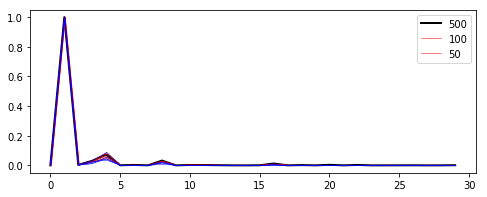

[1]
{'prominences': array([0.99999763]), 'left_bases': array([0]), 'right_bases': array([29])}
done


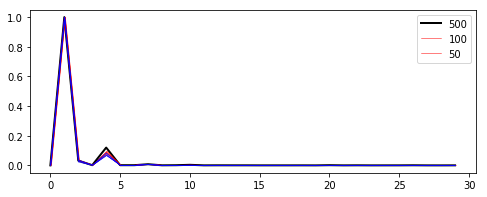

[1]
{'prominences': array([0.99999888]), 'left_bases': array([0]), 'right_bases': array([29])}
done


In [12]:
runLLRsubsamp(evecs_in.copy())
runLLRsubsamp(evecs_out.copy())

In [13]:
def plotLLRresRK(ressy1,smadsnail,scalevec,promval):
    
    from matplotlib import rc
    rc('text', usetex=False)
    #eps_scale of 3 , cutoff of 0.05
    #eps_scale of 6 is best when more n_evecs are considered
    cycle=int(-1)
    for i in scalevec:
        cycle=cycle+1
        rrr = ressy1[int(cycle),:]
        chosenimensiontuple,properties = scipy.signal.find_peaks(rrr, height=None, threshold=None, distance=None, prominence=promval, width=None, wlen=None, rel_height=0.5, plateau_size=None)
        chosenimensions = np.asarray(chosenimensiontuple).reshape(-1,)
        plt.figure(figsize=(4,1.5))
        plt.plot(rrr)
        ridx = chosenimensions
        x = np.linspace(0,len(rrr)-1,len(rrr))

        plt.plot(x[ridx],rrr[ridx],'ro')
        plt.title('Local Linear Regression, '+smadsnail+' , eps_scale=' + str(np.round(i,2)))
#         rridx0 = np.where(ridx==True)
#         print(chosenimensions)
        rridx = list(chosenimensions)
        for h in rridx:
            tx= int(x[h])
            ty = rrr[h]
            ts = str(np.round(ty,2))
            t = plt.text(tx+0.2,ty,tx)
#         print('epsscale,',str(np.round(i,2)),'--rval,', rrr[ridx])
#     print(x[ridx])
    plt.ylabel("$r_k$",fontsize=15)
    plt.xlabel('DMAP dimension',fontsize=12)
    plt.ylim(0,1.2)
    plt.show()

    
    ev_in = x[ridx]
    ev_in = [int(x) for x in ev_in]
    

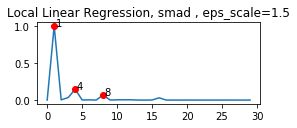

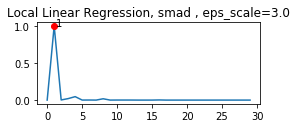

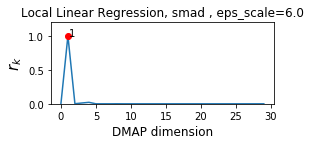

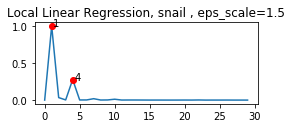

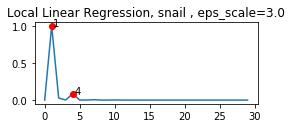

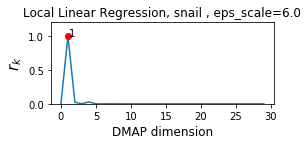

In [14]:
plotLLRresRK(ressy1,'smad',scalevec,promval)
plotLLRresRK(ressy2,'snail',scalevec,promval)

In [15]:
# print(scalevec[3])
peaks,properties = scipy.signal.find_peaks(ressy1[-1,:], height=None, threshold=None, distance=None, prominence=0.1, width=None, wlen=None, rel_height=0.5, plateau_size=None)
# print(peaks)
# print(properties)

In [16]:
#choose important eigenvectors
# ev_in = goodinputs.astype(int).copy() # important eigenvectors for input, determined visually from previous plots
# ev_in = ev_in[2]
# ev_out = goodoutputs.astype(int).copy() # important eigenvectors for output, determined visually from previous plots
# ev_out = ev_out[1]
print("ev_in",ev_in)
print("ev_out",ev_out)

ev_in [1 4]
ev_out [1 4]


In [17]:
# evecs_out = evecs_out*-1
# evecs_in[:,1] = evecs_in[:,1]*-1
# evecs_in[:,4] = evecs_in[:,4]*-1
# evecs_out = 

In [18]:
#save these as CSV files so you don't have to run it again and again

savepath = str(cwd) + '/' + csvsavepath
print(savepath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

    

a = numpy.asarray(evecs_in)
numpy.savetxt(savepath+"evecs_in.csv", a, delimiter=",")
a = numpy.asarray(evals_in)
numpy.savetxt(savepath+"evals_in.csv", a, delimiter=",")
a = numpy.asarray(ev_in)
numpy.savetxt(savepath+"ev_in.csv", a, delimiter=",")


a = numpy.asarray(evecs_out)
numpy.savetxt(savepath+"evecs_out.csv", a, delimiter=",")
a = numpy.asarray(evals_out)
numpy.savetxt(savepath+"evals_out.csv", a, delimiter=",")
a = numpy.asarray(ev_out)
numpy.savetxt(savepath+"ev_out.csv", a, delimiter=",")

a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_in.csv", a, delimiter=",")
a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_out.csv", a, delimiter=",")

/Users/frick/Dparams/DParamsFinal_v5/dmapcsv_agnostic-AGI-zto_numeps50-1dot2-4_rdimval50_n-evecs30cut-True_promval-0dot05_SI-20_subsampF8_sampmax500/expSYST3_PC_SMAD-complex_GENE-caga/


In [19]:
#load the CSV files
savepath = str(cwd) + '/' + csvsavepath

evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evecs_out_csv = np.genfromtxt(savepath+"evecs_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evals_out_csv = np.genfromtxt(savepath+"evals_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
eps_out_csv = np.genfromtxt(savepath+"eps_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
ev_out_csv = np.genfromtxt(savepath+"ev_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [20]:
#use this to load the CSV files for determined using SYST1
#if you are running SYST2 then load the SYST1 DMAP
if conditionid == 'expSYST2_PC':
    print('loading OG DMAP')
#     specid2 = 'mdl_S3conc_IFFLconc_gpy_GRAD-DIFF_nonZTOSQRT-positive_msemedian_forfig'
    specid2 = specid
    conditionid2 = 'expSYST1_PC'
    csvsavepath2 = '_dmap_csv_' + conditionid2 + cond2+ specid2 + 'clean/'

    #load the CSV files
    savepath = str(cwd) + '/' + csvsavepath2
    evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [21]:
evecs_in = evecs_in_csv
evecs_out = evecs_out_csv

evals_in = evals_in_csv
evals_out = evals_out_csv
ev_in = np.asarray(ev_in_csv,dtype='int').reshape(-1,)
ev_out = np.asarray(ev_out_csv,dtype='int').reshape(-1,)

eps_in = eps_in_csv
eps_out = eps_out_csv

In [22]:
print(evecs_out.shape)

(500, 30)


In [23]:
# evecs_in[:,ev_in[0]] = evecs_in[:,ev_in[0]]*-1

(500, 30)
ev_in [1 4]
ev_out [1 4]
0
1
2
3
0
1
2
3
done


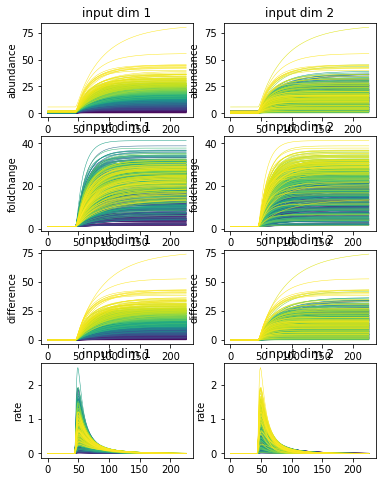

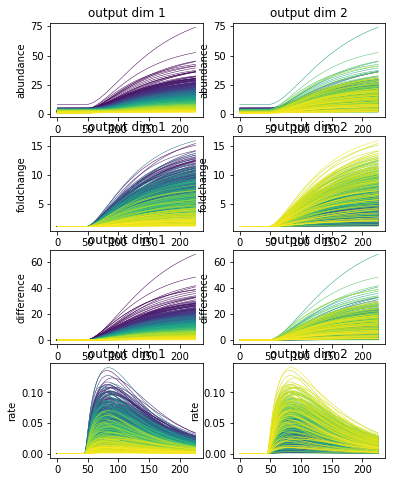

In [24]:
import accessory
importlib.reload(accessory)
# from accessory import plot_trajectories_based_on_dparam
# importlib.reload(accessory)
# from accessory import *
# ev_in = [1,4,11]
# ev_out = [1,7,11]

print(evecs_out.shape)
print('ev_in',ev_in)
print('ev_out',ev_out)
plot_trajectories_based_on_dparam(time_data,ogdin,evecs_in,ev_in,'input')
plot_trajectories_based_on_dparam(time_data,ogdout,evecs_out,ev_out,'output')

# plot_trajectories_based_on_dparam(tvec,traj,evecs_0,ev_0,strstr):
print('done')
# evecs_out[]

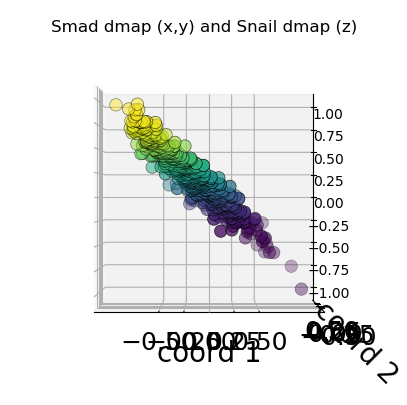

/Users/frick/Dparams/DParamsFinal_v5/2d-manifold_expSYST3_PC/ snailC 3d man.png
done


In [25]:
savepath = str(cwd) + '/2d-manifold_' +conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
fontsize=20
plt.style.use('default')
# plt.style.use('ggplot')   
fsize = (5,5)
msize = 80
lw = 0.5
cmap = plt.cm.viridis

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111, projection='3d')
x = evecs_in[:,ev_in[0]].copy()
y = evecs_in[:,ev_in[1]].copy()
cc = evecs_out[:,ev_out[0]].copy()
z = cc.copy()
csort = np.argsort(cc)
cc = range(len(csort))
# cw = np.where(cc>0)
# cc[cw]=0
# csort = range(len(cc))
xx = x[csort]
yy = y[csort]
zz = z[csort]

xtickvec = np.linspace(-1,1,5)
ax.scatter(xx,yy,zz,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.title('Smad dmap (x,y) and Snail dmap (z)')
savestr = savepath+' snailC 3d man.png'
plt.savefig(savestr,bbox_inches='tight')
ax.view_init(0,-90)
plt.show()

print(savestr)
print('done')

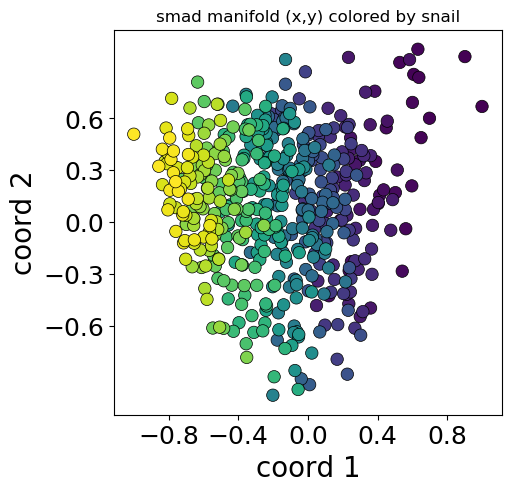

/Users/frick/Dparams/DParamsFinal_v5/2d-manifold_expSYST3_PC/ smad manifold colored by snail.png
done


In [26]:

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)


ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.title('smad manifold (x,y) colored by snail')

xtickvec= np.linspace(-1.6,1.6,5)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
xtickvec= np.linspace(-1.2,1.2,5)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' smad manifold colored by snail.png'
plt.savefig(savestr,bbox_inches='tight')

plt.show()

print(savestr)
print('done')

[1 4]


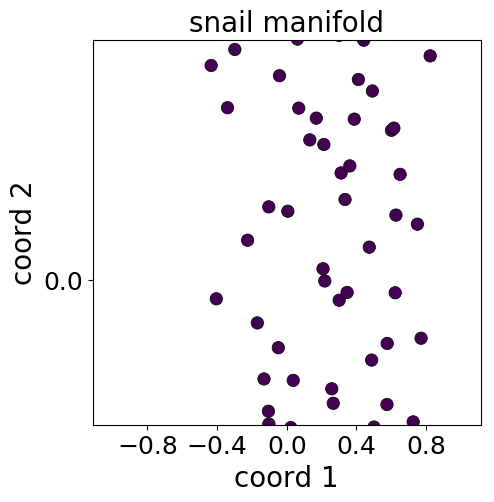

/Users/frick/Dparams/DParamsFinal_v5/2d-manifold_expSYST3_PC/ Snail manifold colored by snail EXTRA.png
done


In [27]:

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
print(ev_out)

xlabelstr = 'coord 1'
ylabelstr = 'coord 2'
if len(ev_out)>1:
    x = evecs_out[:,ev_out[0]].copy()
    y = evecs_out[:,ev_out[1]].copy()
else:
    x = np.asarray(range(evecs_out.shape[1])).reshape(-1,)
    y = evecs_out[:,ev_out[0]].copy()
    y = np.sort(y)
    x = np.argsort(y)
    xlabelstr = 'cell index'
    ylabelstr = 'coord 1'
    
if len(ev_out)>2:
    cc = evecs_out[:,ev_out[2]].copy()
    z = cc.copy()
    csort = np.argsort(cc)
    cc = range(len(csort))
    titlestr = 'snail manifold colored by snail'
else:
    cc = np.zeros(y.shape)
    titlestr = 'snail manifold'
    

xx = x[csort]
yy = y[csort]
zz = z[csort]

ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel(xlabelstr,fontsize=fontsize)
plt.ylabel(ylabelstr,fontsize=fontsize)
plt.title(titlestr,fontsize=fontsize)

if len(ev_out)>1:
    xtickvec= np.linspace(-1.6,1.6,5)
    plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
    xtickvec= np.linspace(-1.2,1.2,5)
    plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)

    ym = np.median(y[:])
    yst = np.std(y[:])
    stdf=0.1
    yl = [ym - yst*stdf,ym + yst*stdf]
    plt.ylim(yl)

savestr = savepath+' Snail manifold colored by snail EXTRA.png'
plt.savefig(savestr,bbox_inches='tight')
plt.show()

print(savestr)
print('done')

In [28]:
# whos

In [29]:
import dill as pickle;
from pathlib import Path
# import os

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

session_savepath = 'session' + conditionid + specidpath + 'clean/'
session_path = repo + session_savepath

print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    os.mkdir(session_path)

session_name = 'seshy'
savename = session_path + session_name

pickle.dump_session(savename)
print(savename)
print('pickle success!!!')

True
making/Users/frick/Dparams/DParamsFinal_v5/sessionexpSYST3_PCagnostic-AGI-zto_numeps50-1dot2-4_rdimval50_n-evecs30cut-True_promval-0dot05_SI-20_subsampF8_sampmax500clean/...
/Users/frick/Dparams/DParamsFinal_v5/sessionexpSYST3_PCagnostic-AGI-zto_numeps50-1dot2-4_rdimval50_n-evecs30cut-True_promval-0dot05_SI-20_subsampF8_sampmax500clean/seshy
pickle success!!!


In [30]:
# import dill as pickle;
# from pathlib import Path

# # cwd = Path().resolve()
# # print(cwd)
# # repo = str(cwd) +'/'

# session_savepath = 'session' + conditionid + specid + 'clean/'
# session_path = repo + session_savepath
# session_name = 'sesh'
# savename = session_path + session_name


# pickle.load_session(savename)
# print(ev_in)

# first attempt to use the original DMAPS [1,3] and [1] using GPy

In [31]:
# ev_in = [1,3]
# ev_out = [1]

In [32]:
print(ev_in)
print(ev_out)

[1 4]
[1 4]


In [33]:
def msefunc(xp,Y):
    mseeach={}
    Yscale = np.zeros(Y.shape)
    xpscale = np.zeros(Y.shape)
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
        mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
    scalex = xpscale
    scaley = Yscale
    mse = np.mean((Yscale-xpscale)**2)
    return scalex,scaley, mse, mseeach

In [34]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)

# sample inputs and outputs
X = evecs_in[:,ev_in]
if len(ev_in)==1:
    X = evecs_in[:,ev_in].reshape(-1,1)


Y = ogdin[:,10].reshape(-1,1) #reshape to look like a 2d input
print(Y.shape)
kerndim = X.shape[1]
ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)

(500, 1)


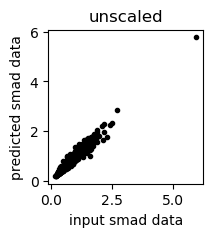

mse =  0.05921734218742846


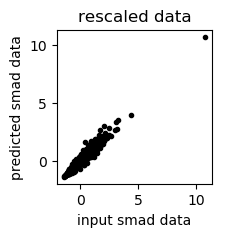

rescaled mse =  0.055617451208409184
{0: 0.055617451208409184}


In [35]:
#can we predict input data well?
xp,xstd = m.predict(X)
# print(xp)

x1 = Y
y1= xp

fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('unscaled')
plt.show()
#mse is deviation from identity
mse = np.mean(((x1/np.std(x1))-(y1/np.std(y1)))**2)
print('mse = ',mse.copy())

x1,y1, mse, mseeach = msefunc(xp,Y)


fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('rescaled data')
plt.show()
print('rescaled mse = ',mse)
print(mseeach.copy())


In [36]:
def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
    kerndim = X.shape[1]
    ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=messages,max_f_eval = max_f_eval)
    return m
    
def Gpy_mse_plot(m,X,Y,inputstr,outputstr):
    xp,xstd = m.predict(X)
    x1,y1, mse, mseeach = msefunc(xp,Y)
    msev = np.asarray(list(mseeach.values())).reshape(-1,)
    x1s = x1.shape[1]
    ws = 1
    fig = plt.figure(figsize=((4 + (ws*(x1s-1)))*x1s,4))
    for i in range(0,x1.shape[1]):
        x = x1[:,i]
        y = y1[:,i]
        if x1.shape[1]==1:
            plt.scatter(x,y,c='k',marker='.')
            plt.xlabel('orig.' + outputstr)
            plt.ylabel('pred.' + outputstr)
        else:
            ax = fig.add_subplot(1,x1s,i+1)
            ax.scatter(x,y,c='k',marker='.')
            plt.xlabel('orig.' + outputstr)
            plt.ylabel('pred.' + outputstr)
        if x1.shape[1]>1:
            plt.title('predict ' + outputstr + ' dim-' + str(i+1) + ' based on ' + inputstr)
        else:
            plt.title('predict ' + outputstr + ' based on ' + inputstr)
        ax = plt.gca()
        t = ax.text(0.01,0.99,'rescaled mse = ',transform=ax.transAxes, horizontalalignment='left',verticalalignment='top')
        t = ax.text(0.01,0.95,str(np.round(msev[i],5)),transform=ax.transAxes, horizontalalignment='left',verticalalignment='top')
    plt.show()
    return mseeach

In [37]:
def predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2):
    msekeeper={}
    import GPy
    #use Smad Manifold to predicut Smad trajectories (1 timepoint)
    # sample inputs and outputs
    max_f_eval = 1000
    messages=False
    inputstr = ss1 + ' dmaps'
    tvec = time_data[1,:]
    basal = ((np.where(tvec<=0))[0])
    peak = ((np.where(tvec<=30))[0])[-1]

    X=X0.copy()
    outputstr = ss1 + ' tpoint'
    Y = sdat1[:,10].reshape(-1,1) #reshape to look like a 2d input
#     Y = sdat1[:,[5,10,15]]
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X=X0.copy()
    outputstr = ss1 + ' max relative rate'
    
    rate=np.zeros(sdat1.shape[0])
    for j in range(sdat1.shape[0]):
        rate[j] = np.max(sdat1[j,:]/np.median(sdat1[j,basal]))

    Y = rate.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss1 + ' maximum integral'
    rate=np.zeros(sdat1.shape[0])
    for j in range(sdat1.shape[0]):
        rate[j] = np.max(np.cumsum(sdat1[j,:]))

    Y = rate.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss1 + ' foldchange at tpeak'
    foldchange = sdat1[:,peak]/np.median(sdat1[:,basal])
    Y = foldchange.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X = X0.copy()
    outputstr = ss1 + ' difference at tpeak'
    foldchange = sdat1[:,peak]-np.median(sdat1[:,basal])
    Y = foldchange.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach


    X=X0.copy()
    outputstr = ss2 + ' difference'
    snaildiff = sdat2[:,peak]-np.median(sdat2[:,basal])
    Y = snaildiff.reshape(-1,1) #reshape to look like a 2d input
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach

    X=X0.copy()
    outputstr = ss2 + ' dmap'
    Y = X2.copy()
    m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
    mseeach = Gpy_mse_plot(m,X,Y,inputstr,outputstr)
    msekeeper[outputstr]=mseeach
    
    for v in range(X.shape[1]):
        print(v)
#         outputstr = ss2 + ' dmap, using ' +ss1+ ' ' +str(list(range(1,v+2)))
        inputstr0 = ss1 + ' ' + str(list(range(1,v+2)))
        print(inputstr0)
        X=X0.copy()
        Y = X2.copy()
        m = Gpymadness(X[:,0:v+1],Y,messages,max_f_eval,inputstr0,outputstr)
        mseeach = Gpy_mse_plot(m,X,Y,inputstr0,outputstr)
        msekeeper[outputstr]=mseeach
        
    return msekeeper


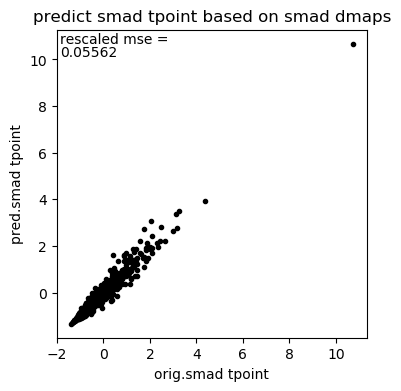

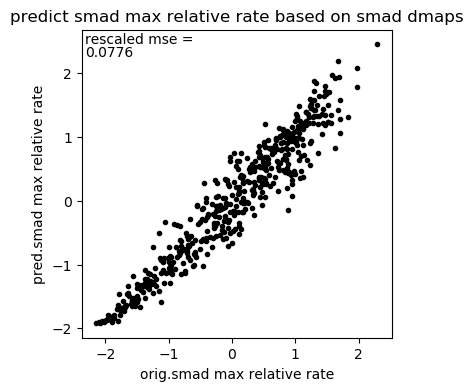

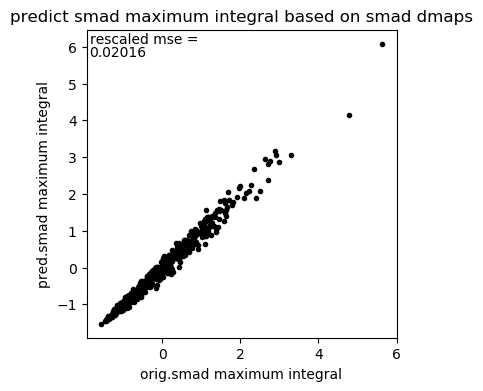

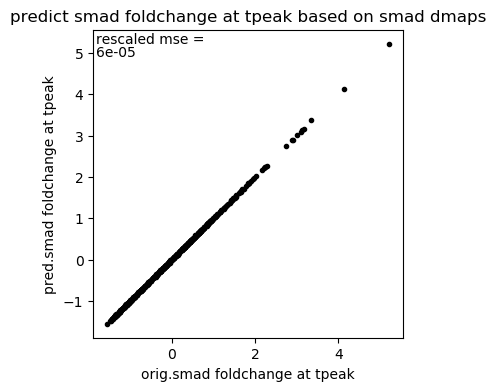

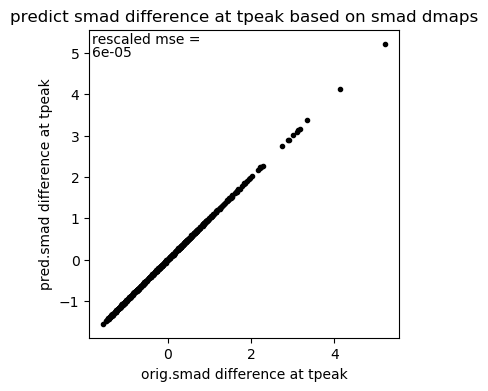

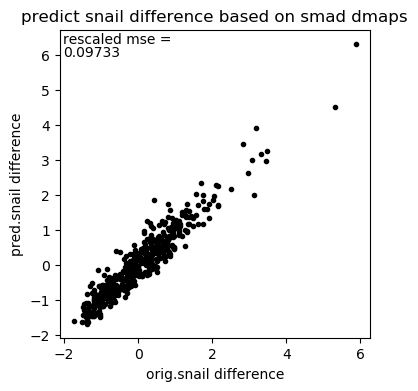

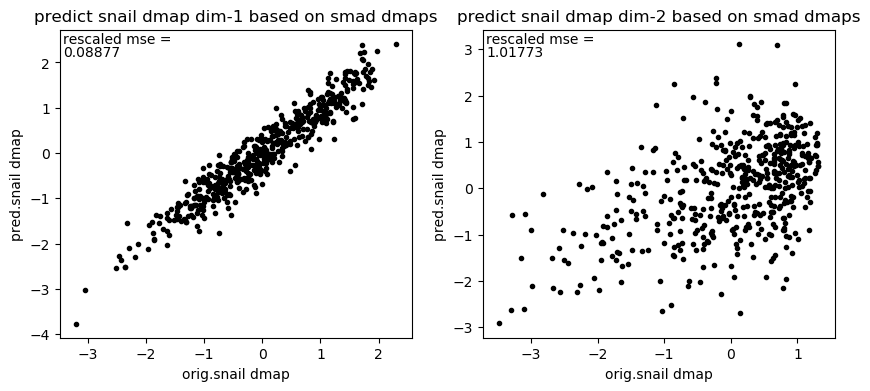

0
smad [1]


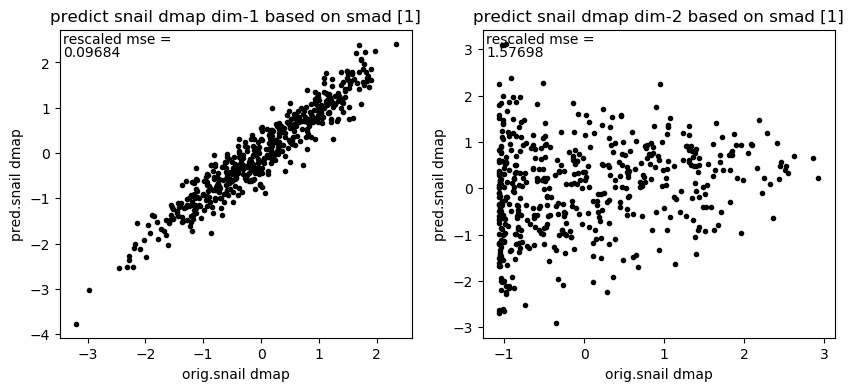

1
smad [1, 2]


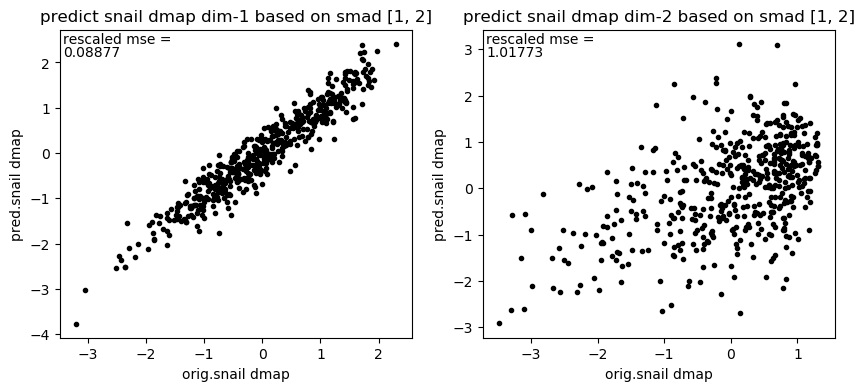

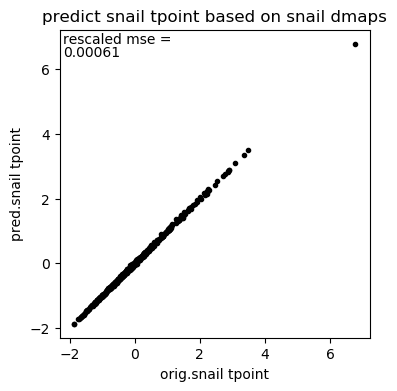

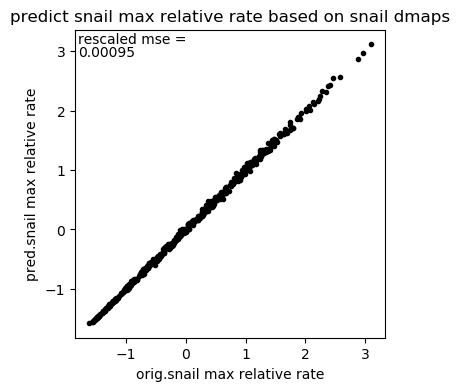

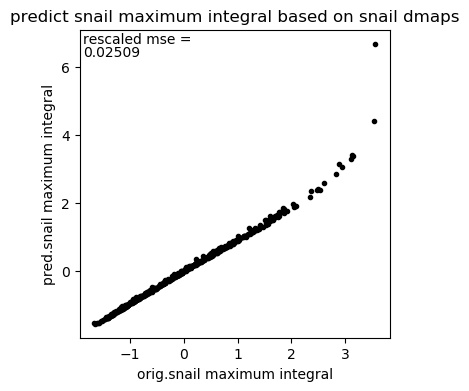

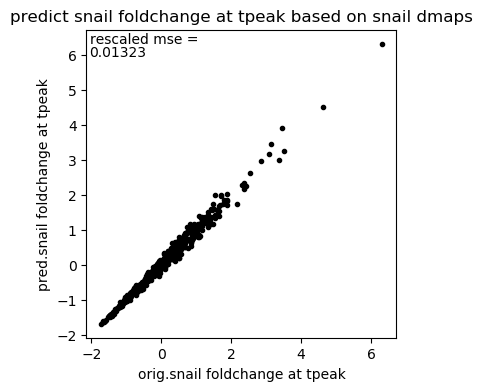

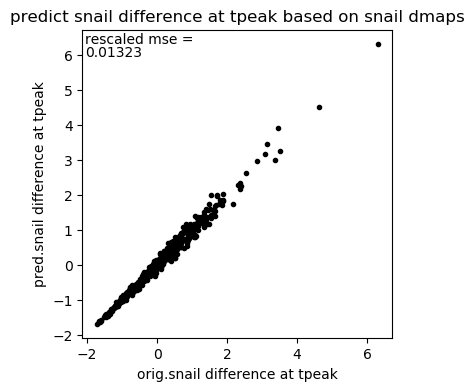

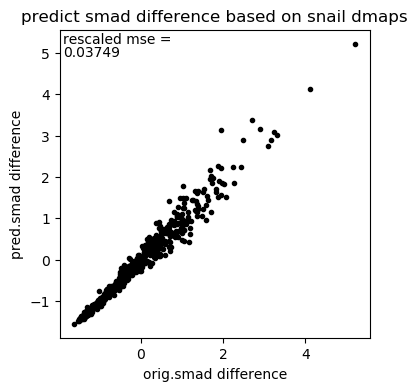

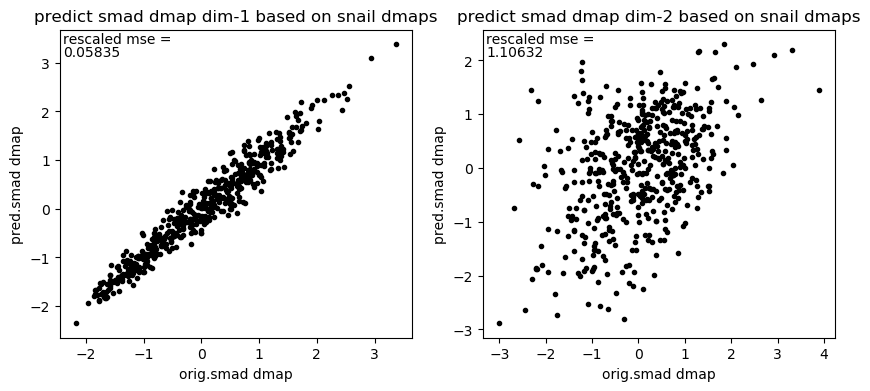

0
snail [1]


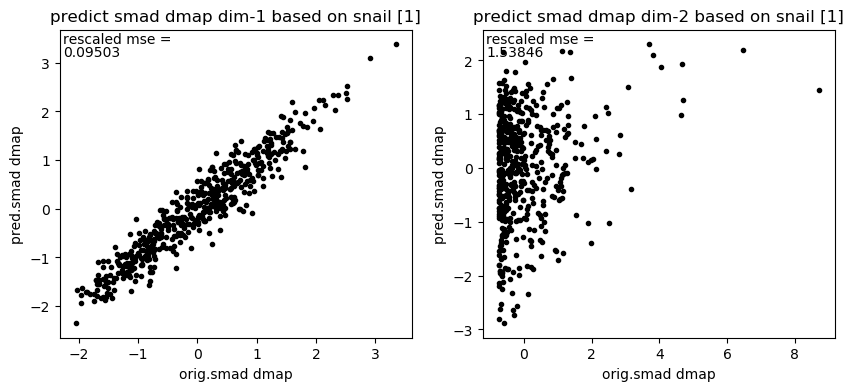

1
snail [1, 2]


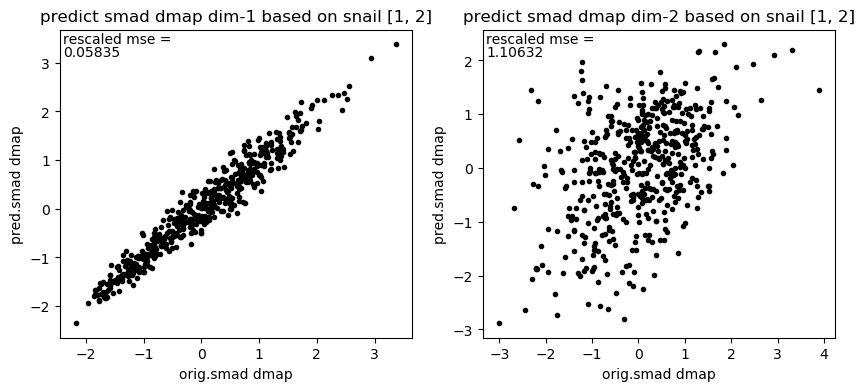

In [38]:
#predictions based on Smad
ss1 = 'smad'
ss2 = 'snail'
X = evecs_in[:,ev_in].copy()
X0=X.copy()
sdat1 = ogdin.copy()
sdat2 = ogdout.copy()
X2 = evecs_out[:,ev_out].copy()
msekeepersmad = predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2)

ss1 = 'snail'
ss2 = 'smad'
X = evecs_out[:,ev_out].copy()
X0=X.copy()
sdat1 = ogdout.copy()
sdat2 = ogdin.copy()
X2 = evecs_in[:,ev_in].copy()
msekeepersnail = predSpecificBasedOnDMAP(time_data,ss1,ss2,X,X2,sdat1,sdat2)

In [39]:
def Gpy_eachtpoint(X,Yin0,samp_vec,messages,max_f_eval,inputstr,outputstr):
    Yin = Yin0[:,samp_vec]
    msearray = np.zeros(Yin.shape[1])
    for j in range(0,Yin.shape[1]):
        Y = Yin[:,j].reshape(-1,1)

        max_f_eval = 1000
        messages=False
        m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)

        xp,xstd = m.predict(X)
        x = Y
        y = xp
        x1,y1, mse, mseeach = msefunc(xp,Y)
        msearray[j]=mse
        print(j, end=" " )
    print('completed' + inputstr + outputstr)
    return msearray


In [40]:


time_vec = time_data[1,:]
tsample = 3
tsamp = np.min([tsample,len(time_vec)])

print(len(time_vec))

axfact = 5

ax1 = np.ceil(len(time_vec)/2) - np.ceil(len(time_vec)/5)
ax2 = np.ceil(len(time_vec)/2) + np.ceil(len(time_vec)/5)
samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
print(samp_vec)
print(time_vec[samp_vec])


227
[ 68 114 160]
[15.5556 45.9462 76.338 ]


In [41]:
def make_samp_vec(Yin):
    ltv = Yin.shape[1]
    ax1 = np.ceil(ltv/2) - np.ceil(ltv/5)
    ax2 = np.ceil(ltv/2) + np.ceil(ltv/5)
    samp_vec = np.linspace(ax1,ax2,tsamp,dtype='int32')
    return samp_vec

In [42]:

def gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2):
    #attempt to predict input data at all timepoints using Smad Dmaps
    msecombo={} #initialize the master msecombo
    max_f_eval = 1000
    messages = False

    ## run each
    outputstr = ss1 + ' at each tpoint'
    Yin = fsmad
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = ss2 + ' at each tpoint'
    Yin = snaildat
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = 'f('+ss1+')'
    Z = fsmad.copy()
    mu, sigma = 0, 0.0 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray

    
    outputstr = 'f('+ss1+')+smallnoise'
    Z = fsmad.copy()
    mu, sigma = 0, 0.01 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
    #     s = np.random.lognormal(mean, sigma, size=fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray

    
    outputstr = 'f('+ss1+')+mediumnoise'
    Z = fsmad.copy()
    mu, sigma = 0, 0.1 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = (fsmad[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    
    outputstr = 'f('+ss1+'_processed)'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.0 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    outputstr = 'f('+ss1+'_processed)+s_noise'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.01 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s

    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    
    outputstr = 'f('+ss1+'_processed)+m_noise'
    Z = fsmadpro.copy()
    mu, sigma = 0, 0.1 # mean and standard deviation
    for j in range(0,fsmadpro.shape[1]):
        s = np.random.normal(mu, sigma, fsmadpro.shape[0])
        Z[:,j] = (fsmadpro[:,j]**2) + s


    Yin = removeAllzerotpoints(Z.copy())
    samp_vec = make_samp_vec(Yin)
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray


    outputstr = 'noise only'
    Z = fsmad.copy()
    samp_vec = make_samp_vec(Yin)
    mu, sigma = 0, 1 # mean and standard deviation
    for j in range(0,fsmad.shape[1]):
        s = np.random.normal(mu, sigma, fsmad.shape[0])
        Z[:,j] = s

    Yin = Z
    msearray = Gpy_eachtpoint(X,Yin,samp_vec,messages,max_f_eval,inputstr,outputstr)
    msecombo[outputstr] = msearray
    return msecombo

In [43]:
# msecombosmad = msecombo.copy()
inputstr = 'smad dmap'
X = evecs_in[:,ev_in].copy()
fsmad = reducedimensionalityforGPy(ogdin.copy())
fsmadpro = reducedimensionalityforGPy(observed_data_in.copy())
snaildat = reducedimensionalityforGPy(ogdout.copy())
ss1 = 'smad'
ss2 = 'snail'
msecombosmad = gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2)


TypeError: reducedimensionalityforGPy() missing 1 required positional argument: 'reducedimval'

In [ ]:
inputstr = 'snail dmap'
X = evecs_out[:,ev_in].copy()
fsmad = reducedimensionalityforGPy(ogdout.copy())
fsmadpro = reducedimensionalityforGPy(observed_data_out.copy())
snaildat = reducedimensionalityforGPy(ogdin.copy())
ss1 = 'snail'
ss2 = 'smad'
msecombosnail = gpy_each_timepoint(inputstr,X,fsmad,fsmadpro,snaildat,ss1,ss2)


In [ ]:
def msecomboplotter(tvec,msecombo,smadsnail,yl):
    plt.figure(figsize=(5,3))
    subkeep={}
    cycle=0
    for k in msecombo.keys():
        cycle=cycle+1
        v = msecombo[k]
      # k is now the key
      # v is the value
        subkeep[k]=v
        plt.semilogy(tvec+(cycle/100),v,'*-', label=k)
        
    plt.ylim(yl[0],yl[1])
    plt.ylabel('mean square error')
    plt.xlabel('time point, value')
    plt.title('error for different predictions based on '+ smadsnail + ' manifold') 
    plt.legend()
    plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
    plt.show()
        
def msecombomedianplotter(msecombo,smadsnail):
    plt.figure(figsize=(6,3))
    msecombo2 = msecombo.copy()
    cycle=-1
    for k in msecombo.keys():
        y={}
        cycle=cycle+1
        v = msecombo[k]
        y[cycle] = np.median(v)
        msecombo2[k] = y

    cycle=-1
    for k in msecombo2.keys():
        cycle=cycle+1
        v = msecombo2[k]
      # k is now the key
      # v is the value
        y = v.values()
        if len(y)==1:
            x = cycle
            markerstr='o'
        else:
            x = np.linspace(cycle-0.1,cycle+0.1,len(y))
            markerstr='*-'
        plt.semilogy(x,y,markerstr, label=k)
        
            # plt.ylim(0.01,1)
    plt.ylabel('mean square error')
    plt.xlabel('attempted prediction')
    plt.title('error for different predictions based on ' + smadsnail + ' manifold') 
    plt.legend(loc='right',bbox_to_anchor=(1.5, 0.5))
    plt.show()
    
    
def msekeeperplotter(msekeeper2,yl,smadsnail):  
    cycle=-1
    plt.figure(figsize=(4,2))
    for k in msekeeper2.keys():
        cycle=cycle+1
        v = msekeeper2[k]
      # k is now the key
      # v is the value
        y = np.asarray(list(v.values())).reshape(-1,)
        if len(y)==1:
            x = cycle
            markerstr='o'
            msize = 7
            if y<yl[0]:
                x = cycle
                markerstr = 'v'
                print('edited value lower than,', yl[0])
                y = yl[0]*2
                msize=7
        else:
            x = np.linspace(cycle-0.1,cycle+0.1,len(y))
            markerstr='*-'
            msize=7
        plt.semilogy(x,y,markerstr, label=k, markersize = msize)

    plt.ylim(yl[0],yl[1])
    plt.ylabel('mean square error')
    plt.xlabel('attempted prediction')
    plt.title('error for different predictions based on ' + smadsnail + ' manifold') 
    plt.legend(loc='right',bbox_to_anchor=(1.8, 0.5))
    plt.show()

In [ ]:
yl = [1e-4,5]
smadsnail='smad'
msekeeperplotter(msekeepersmad,yl,smadsnail)
smadsnail='snail'
msekeeperplotter(msekeepersnail,yl,smadsnail)
   

In [ ]:


samp_vec = make_samp_vec(time_data_in)
tvec = time_data_in[1,:]
smadsnail = 'smad'
msecomboplotter(tvec[samp_vec]/60,msecombosmad,smadsnail,yl)
smadsnail = 'snail'
msecomboplotter(tvec[samp_vec]/60,msecombosnail,smadsnail,yl)

In [ ]:
import dill as pickle;
from pathlib import Path
# import os

# cwd = Path().resolve()
# print(cwd)
# repo = str(cwd) +'/'

session_savepath = 'session' + conditionid + specidpath + 'clean/'
session_path = repo + session_savepath

print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    os.mkdir(session_path)

session_name = 'seshyAfterGPy'
savename = session_path + session_name

pickle.dump_session(savename)
print(savename)
print('pickle success!!!')